In [1]:
import bottleneck as bn
import matplotlib
import matplotlib.dates as mdates
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scienceplots
import scipy
import scipy.signal
import scipy.special
import scipy.stats
import sklearn.decomposition

from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])
plt.rcParams['figure.figsize'] = (8, 4)
title_font = {'fontsize': 16, 'weight': 'bold', 'style': 'italic'}
path_effect = [pe.withStroke(linewidth=2.0, foreground="k")]

read_path = 'Data/'
save_path = 'Figure/'

%matplotlib ipympl

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_35192\3858509205.py:4: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


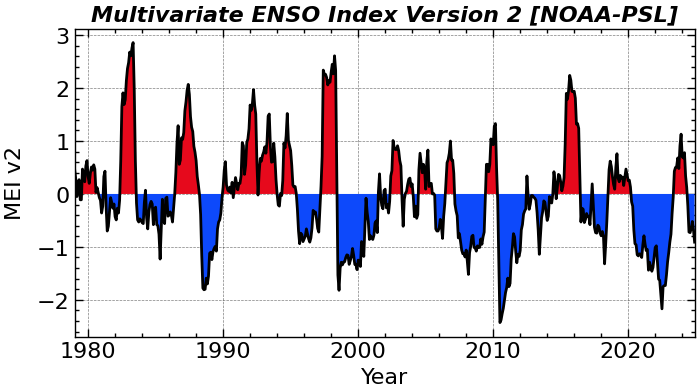

In [4]:
meiv2_df = pd.read_csv(read_path + 'meiv2.data',
                       header=None,
                       skiprows=1,
                       sep='\s+',
                       on_bad_lines='skip')
meiv2_values = np.array(meiv2_df.iloc[:46, 1:]).flatten().astype(float)
meiv2_years = np.array(
    meiv2_df.iloc[0, 0]).astype(float) + np.arange(meiv2_values.size) / 12.0

plt.close()
ax1 = plt.subplot(1, 1, 1)

ax1.fill_between(meiv2_years,
                 0 * meiv2_values,
                 meiv2_values,
                 where=meiv2_values <= 0)
ax1.fill_between(meiv2_years,
                 0 * meiv2_values,
                 meiv2_values,
                 where=meiv2_values > 0)

ax1.plot(meiv2_years, meiv2_values, 'k-', alpha=1.0)

ax1.autoscale(axis='x', tight=True)
ax1.set_xlabel('Year')
ax1.set_ylabel('MEI v2')
ax1.set_title('Multivariate ENSO Index Version 2 [NOAA-PSL]', **title_font)
ax1.yaxis.set_label_coords(-0.08, 0.5)

plt.savefig(save_path + 'figure_meiv2' + '.png', bbox_inches='tight', dpi=300)

plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_35192\103045916.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


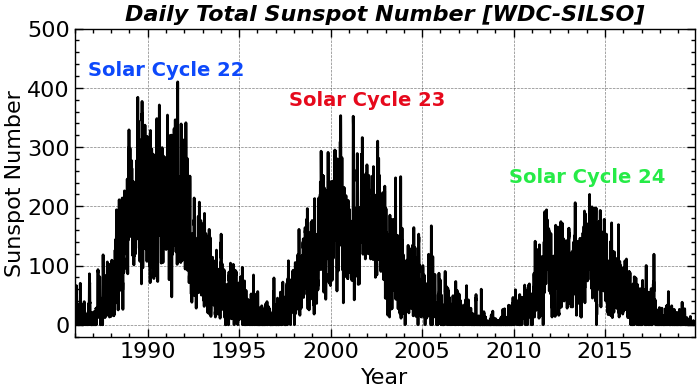

In [5]:
sn_df = pd.read_csv(read_path + 'SN_d_tot_V2.0.txt',
                    header=None,
                    sep='\s+',
                    on_bad_lines='skip')
sn_years = np.array(sn_df.iloc[:, 3]).astype(float)
sn_sn = np.array(sn_df.iloc[:, 4]).astype(float)

plt.close()
ax1 = plt.subplot(1, 1, 1)

ax1.plot(sn_years, sn_sn, 'k-', alpha=1.0)

ax1.autoscale(axis='x', tight=True)
ax1.set_xlim(1986, 2019.9)
ax1.set_ylim(-20, 500)
ax1.set_xlabel('Year')
ax1.set_ylabel('Sunspot Number')
ax1.set_title('Daily Total Sunspot Number [WDC-SILSO]', **title_font)

ax1.text(1991,
         430,
         'Solar Cycle 22',
         fontsize=14,
         color='C0',
         ha='center',
         va='center',
         weight='bold')
ax1.text(2002,
         380,
         'Solar Cycle 23',
         fontsize=14,
         color='C1',
         ha='center',
         va='center',
         weight='bold')
ax1.text(2014,
         250,
         'Solar Cycle 24',
         fontsize=14,
         color='C2',
         ha='center',
         va='center',
         weight='bold')
ax1.yaxis.set_label_coords(-0.08, 0.5)

plt.savefig(save_path + 'figure_sunspot' + '.png', bbox_inches='tight', dpi=300)

plt.show()

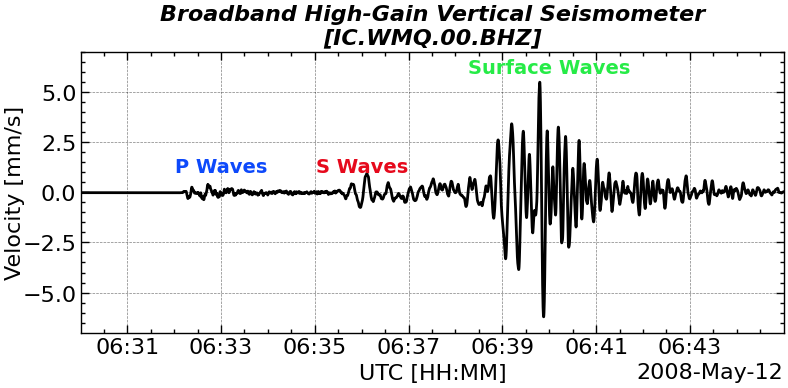

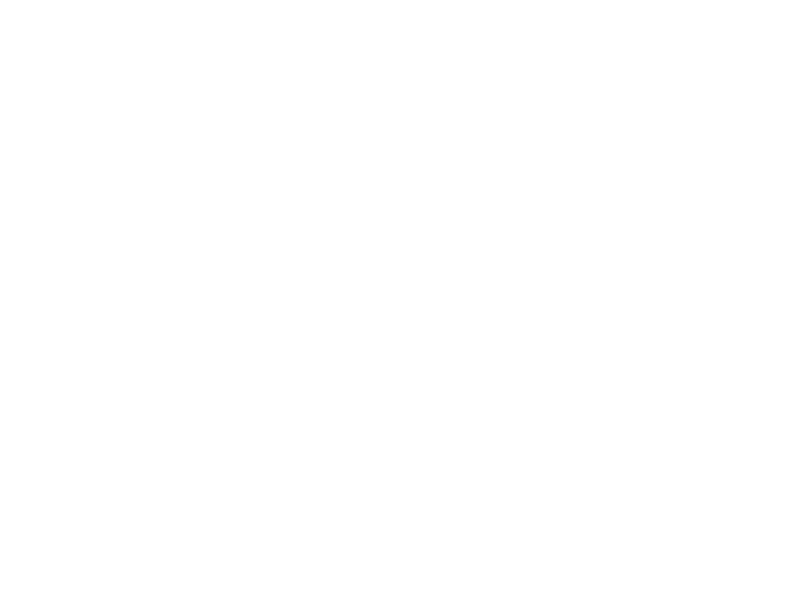

In [ ]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

# 连接IRIS服务
client = Client("IRIS")

starttime = UTCDateTime("2008-05-12T06:30:01")
endtime = UTCDateTime("2008-05-12T06:45:00")
# 下载波形数据（垂向BHZ）
st = client.get_waveforms(
    network="IC", station="WMQ", location="00", channel="BHZ",
    starttime=starttime,
    endtime=endtime
)


# 下载台站元数据（响应信息）
inv = client.get_stations(
    network="IC", station="WMQ", level="response",
    starttime=starttime,
    endtime=endtime
)
st.remove_response(inventory=inv, output="VEL")  


%matplotlib ipympl
plt.close()
plt.cla()
plt.clf()
ax1 = plt.subplot(1, 1, 1)
dt = 1 / st.traces[0].stats.sampling_rate
t = np.datetime64(starttime) + (np.arange(0, len(st[0].data)).astype(float) * dt * 1e3).astype('timedelta64[ms]')
ax1.plot(t, st[0].data * 1e3, 'k-')
ax1.set_ylim(-6.99, 7)
ax1.set_xlabel('UTC [HH:MM]')
ax1.set_ylabel('Velocity [mm/s]')
ax1.set_title('Broadband High-Gain Vertical Seismometer\n' + f"[{st[0].id}]", **title_font)
ax1.autoscale(axis = 'x', tight = True)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.text(np.datetime64('2008-05-12T06:33:00'), 1.3, 'P Waves', fontsize=14, color='C0', ha='center', va='center', weight = 'bold')
ax1.text(np.datetime64('2008-05-12T06:36:00'), 1.3, 'S Waves', fontsize=14, color='C1', ha='center', va='center', weight = 'bold')
ax1.text(np.datetime64('2008-05-12T06:40:00'), 6.2, 'Surface Waves', fontsize=14, color='C2', ha='center', va='center', weight = 'bold')
ax1.yaxis.set_label_coords(-0.08, 0.5)

plt.savefig(save_path + 'figure_seismic_waves' + '.png',bbox_inches='tight',dpi=300)
plt.show()

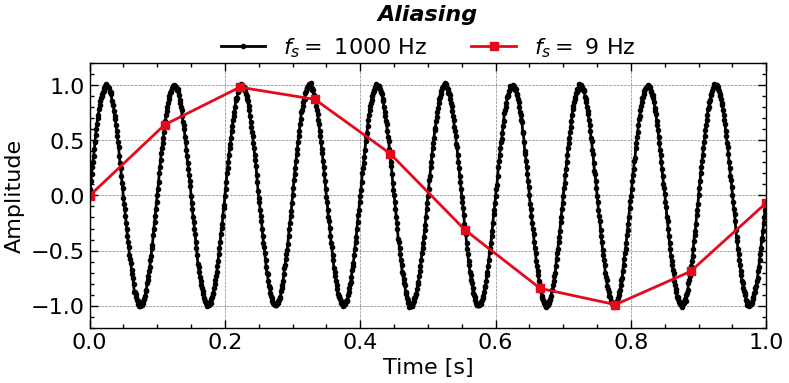

In [ ]:
plt.close()
ax1 = plt.subplot(1, 1, 1)


omega0 = 2 * np.pi * 10.0
n = 1000
N_DOWNSAMPLE = 111
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
sig = np.sin(omega0 * t) + np.random.randn(t.size) * 0.01
# ax1.plot(time, signal, 'k-', label = 'Signal')
ax1.plot(t, sig, 'ko-', label=r'$\mathit{f_s}=$' + ' %d Hz' % fs)
ax1.plot(t[::N_DOWNSAMPLE], sig[::N_DOWNSAMPLE], 'C1s-', label='$f_s=$ %d Hz' % (fs / N_DOWNSAMPLE), markersize=6, fillstyle = 'full')

# plt.title('Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

ax1.set_xlim(0, 1)
ax1.set_ylim(-1.2, 1.2)

ax1.legend(loc='upper center', frameon=False, ncol = 3, bbox_to_anchor=(0.5, 1.18))
ax1.set_title('Aliasing', y = 1.13, **title_font)
plt.tight_layout()

plt.savefig(save_path + 'figure_aliasing' + '.png',bbox_inches='tight',dpi=300)

plt.show()

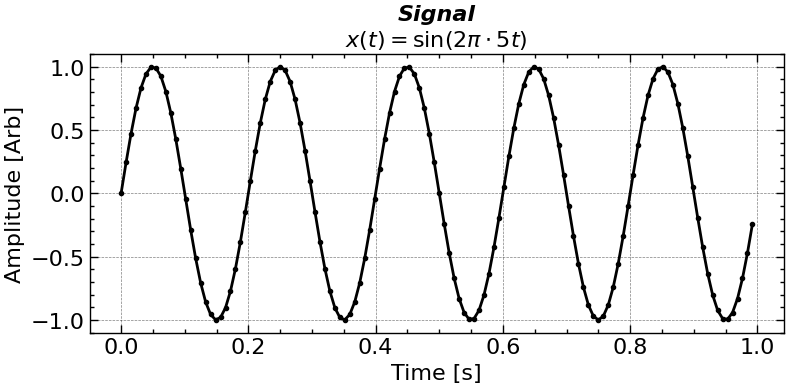

In [ ]:
%matplotlib ipympl
plt.close()
plt.cla()
plt.clf()

ax1 = plt.subplot(1, 1, 1)

omega0 = 2 * np.pi * 5.0

n = 2 ** 7
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt  # Sampling frequency

sig = np.sin(omega0 * t)
ax1.plot(t, sig, 'ko-')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude [Arb]')
ax1.set_title('Signal\n' + r'$x(t) =\mathrm{sin}(2\pi \cdot 5 t)$', **title_font)
plt.tight_layout()
plt.savefig(save_path + 'figure_signal' + '.png',bbox_inches='tight',dpi=300)

plt.show()

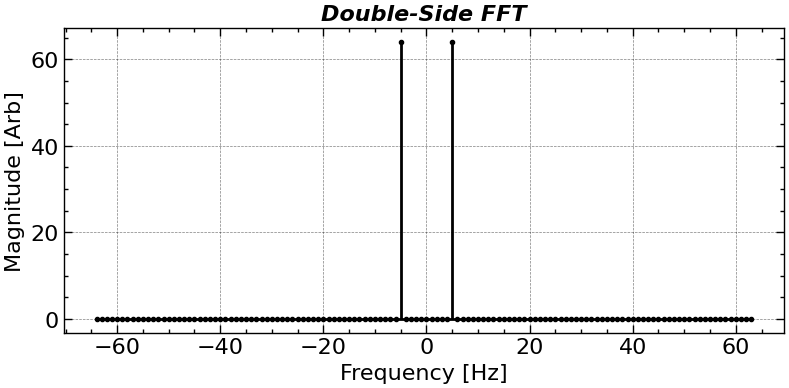

In [25]:
%matplotlib ipympl
plt.close()
plt.cla()
plt.clf()

ax1 = plt.subplot(1, 1, 1)

omega0 = 2 * np.pi * 5.0

n = 2 ** 7
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt  # Sampling frequency

sig = np.sin(omega0 * t)

f = np.fft.fftfreq(n, dt)
coef = np.fft.fft(sig)

ax1.stem(f, np.abs(coef), markerfmt = 'ko', basefmt='k-', linefmt = 'k-')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Magnitude [Arb]')
ax1.set_title('Double-Side FFT', **title_font)
plt.tight_layout()
plt.savefig(save_path + 'figure_fft_double_side' + '.png',bbox_inches='tight',dpi=300)

plt.show()

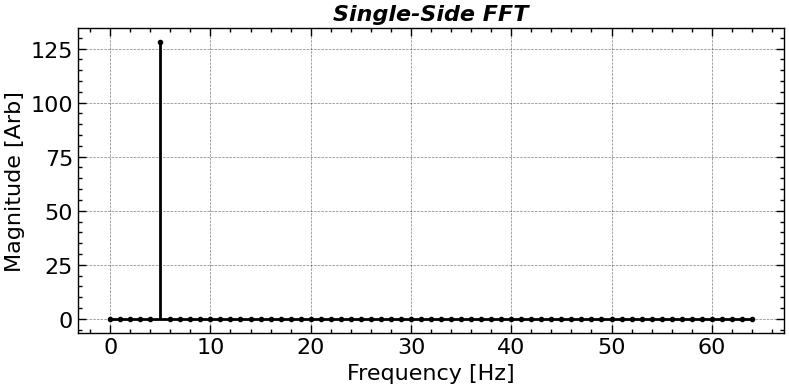

In [28]:
%matplotlib ipympl
plt.close()
plt.cla()
plt.clf()

ax1 = plt.subplot(1, 1, 1)

omega0 = 2 * np.pi * 5.0

n = 2 ** 7
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt  # Sampling frequency

sig = np.sin(omega0 * t)

f = np.fft.rfftfreq(n, dt)
coef = np.fft.rfft(sig)

coef[f > 0] *= 2

ax1.stem(f, np.abs(coef), markerfmt = 'ko', basefmt='k-', linefmt = 'k-')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Magnitude [Arb]')
ax1.set_title('Single-Side FFT', **title_font)
plt.tight_layout()
plt.savefig(save_path + 'figure_fft_single_side' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
%matplotlib ipympl
plt.close()

plt.figure(figsize=(8, 8), tight_layout=True)

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

omega0 = 2 * np.pi * 10.0

n = 1000
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt  # Sampling frequency

sig = np.sin(omega0 * t)

ax1.plot(t, sig, 'ko-', label = '$\mathit{f_s}=$%d Hz' % fs)

# coefs = np.fft.rfft(x)
# freq = np.fft.rfftfreq(len(t), t[1] - t[0])

# ax2.stem(freq, np.abs(coefs), linefmt = 'k', markerfmt = 'ko', basefmt = 'k-')

coefs = np.fft.fft(sig)
f = np.fft.fftfreq(len(t), t[1] - t[0])

ax2.stem(f, np.abs(coefs), linefmt = 'k', markerfmt = 'ko', basefmt = 'k-')


ax1.set_title(r'$x(t) =\mathrm{sin}(2\pi \cdot 5 t)$')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude [Arb]')

ax2.set_title(r'Double-Side $|X[f]|$', **title_font)
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Coefficient [Arb]')

ax2.set_ylim(-20, 550)


ax1.legend(frameon = False, bbox_to_anchor = (0.9, 1.15), loc = 'upper center')

plt.tight_layout()

plt.savefig(save_path + 'figure_dft_double_side' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

plt.figure(figsize=(8, 8), tight_layout=True)

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

omega0 = 2 * np.pi * 10.0
# omega1 = 2 * np.pi * 12.0

n = 1000
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt  # Sampling frequency
# x = np.sin(omega0 * time) + np.sin(omega1 * time)
sig = np.sin(omega0 * t)

ax1.plot(t, sig, 'ko-', label = '$\mathit{f_s}=$%d Hz' % fs)

coefs = np.fft.fft(sig)
f = np.fft.fftfreq(len(t), dt)

pos_mask = f >= 0
f = f[pos_mask]

ax2.stem(f, np.abs(coefs)[pos_mask], linefmt = 'k', markerfmt = 'ko', basefmt = 'k-')

N_PADDING = 20

t = np.linspace(0, 1 + N_PADDING / 200, 200 + N_PADDING, endpoint=False)
sig = np.sin(omega0 * t)
sig *= np.hanning(np.size(sig)) * np.sqrt(8 / 3)
sig[-(N_PADDING + 1):] *= 0

# ax1.plot(time, x, 'r.-', label = 'Windowed [Hanning]', alpha = 0.5)

coefs = np.fft.fft(sig, n = len(t))
f = np.fft.fftfreq(len(t), t[1] - t[0])

pos_mask = f >= 0
f = f[pos_mask]

# ax2.stem(freq, np.abs(coefs)[pos_mask], linefmt = 'r', markerfmt = 'r.', basefmt = 'r-')

for N_PADDING in range(1, 100, 2):
    coefs = np.fft.fft(sig, n = len(t) + N_PADDING)
    f = np.fft.fftfreq(len(t) + N_PADDING, t[1] - t[0])

    pos_mask = f >= 0
    f = f[pos_mask]
    arg_max = np.argmax(np.abs(coefs)[pos_mask])
    # ax2.plot(freq[arg_max], np.abs(coefs)[pos_mask][arg_max], 'g.')

ax1.set_title(r'$x(t) =\mathrm{sin}(2\pi \cdot 5 t)$')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude [Arb]')

ax2.set_title(r'Single-Side $|X[f]|$', **title_font)
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Coefficient [Arb]')

# ax2.set_xlim(0, 20)
ax2.set_ylim(-2.5, 55)

ax1.legend(frameon = False, bbox_to_anchor = (0.9, 1.15), loc = 'upper center')

plt.tight_layout()

# plt.savefig(save_path + 'figure_dft' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import time
import sympy

plt.close()

plt.figure(figsize=single_panel_figsize, tight_layout=True)
ax1 = plt.subplot(1, 1, 1)

N_LENGTHS = np.arange(2, 256, 1)
TIME_PER_THOUSAND_RUNS_NUMPY = np.zeros(N_LENGTHS.size)
TIME_PER_THOUSAND_RUNS_SCIPY = np.zeros(N_LENGTHS.size)
N_REPEATS = 10000

for N_LENGTH in N_LENGTHS:
    sig = np.random.randn(N_LENGTH)

    _start_time = time.perf_counter_ns()

    for _ in range(N_REPEATS):
        coefs = np.fft.rfft(sig)

    _end_time = time.perf_counter_ns()

    TIME_PER_THOUSAND_RUNS_NUMPY[
        N_LENGTHS == N_LENGTH] = (_end_time - _start_time) / 1e9 / N_REPEATS

    # _start_time = time.perf_counter_ns()

    # for _ in range (N_REPEATS):
    #     coefs = scipy.fft.fft(signal, workers = -1)

    # _end_time = time.perf_counter_ns()

    # TIME_PER_THOUSAND_RUNS_SCIPY[N_LENGTHS == N_LENGTH] = (_end_time - _start_time) / 1e9 / N_REPEATS

for i in N_LENGTHS:
    n = N_LENGTHS[i - 2]
    n_prime_factor = sum(sympy.ntheory.factor_.factorint(n).values())

    sc1 = ax1.plot(n,
                   1e9 * TIME_PER_THOUSAND_RUNS_NUMPY[i - 2],
                   color=matplotlib.cm.jet_r(((n_prime_factor - 1) / 7)),
                   marker='o')

circled_numbers = [181, 191, 197, 199]
for idx, circled_number in enumerate(circled_numbers):
    n = circled_number
    n_prime_factor = sum(sympy.ntheory.factor_.factorint(n).values())
    ax1.plot(n,
             1e9 * TIME_PER_THOUSAND_RUNS_NUMPY[N_LENGTHS == n],
             's',
             color=f"C{idx}",
             fillstyle='none',
             markersize=8,
             label=f'Prime {n}',
             zorder=-1)
    ax1.text(n,
             1e9 * TIME_PER_THOUSAND_RUNS_NUMPY[N_LENGTHS == n] +
             (1000 if n == 199 else 500),
             f'{n}',
             color=f"C{idx}",
             ha='center',
             va='bottom',
             fontsize=10,
             weight='bold',
             path_effects=[
                 matplotlib.patheffects.withStroke(linewidth=2, foreground='w')
             ])

ax1.set_ylabel('Computational Time [ns]')
ax1.set_xlabel('Signal Length N')

ax1.set_title('Performance Test' + f" [{N_REPEATS} times]\n" + 'numpy.fft.fft', **title_font)
# ax2.set_title('scipy.fft.fft Performance\n' + f"Repeat {N_REPEATS} times")

# ax1.set_yscale('log')

cmap = matplotlib.cm.jet_r
bounds = [1, 2, 3, 4, 5, 6, 7, 8]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N, extend='both')

ax2 = ax1.inset_axes([1.02, 0.00, 0.04, 1.0])
cbar = plt.gcf().colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
                          cax=ax2,
                          orientation='vertical',
                          label="Number of Prime Factors")

plt.text(0.7,
         -.08,
         'Prime',
         transform=ax2.transAxes,
         ha='center',
         va='top',
         color='r',
         fontweight='bold',
         fontsize=12)
plt.text(0.7,
         1.08,
         '$\mathbf{2^n}$',
         transform=ax2.transAxes,
         ha='center',
         va='bottom',
         color='b',
         fontweight='bold',
         fontsize=12)

# ax1.set_yscale('log')

plt.tight_layout()

plt.savefig(save_path + 'figure_numpy_fft_performance' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

n = 100
t = np.linspace(0, 1, n, endpoint=False)

omega0 = 2 * np.pi * 5.25
sig = np.sin(omega0 * t)

ax1.plot(t, sig, 'ko-', label = '$\mathit{f_s}=$200 Hz')

coefs = np.fft.fft(sig)
f = np.fft.fftfreq(len(t), t[1] - t[0])

pos_mask = f >= 0
f = f[pos_mask]

ax2.stem(f, np.abs(coefs)[pos_mask], linefmt = 'k', markerfmt = 'ko', basefmt = 'k-')
# ax2.vlines(5.25, 0, 100, color='C1', linestyle='--')

ax1.set_title(r'$x(t) =\mathrm{sin}(2\pi \cdot 5.25 t)$')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')

ax2.set_title(r'${\hat{x}(f)}$')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Coefficient')

ax2.set_xlim(-0.5, 20)
ax2.set_ylim(-2, 55)

ax1.legend(frameon = False, bbox_to_anchor = (0.9, 1.15), loc = 'upper center')

plt.tight_layout()

ax2.text(13, 15., 'Spectral Leakage', fontsize=20, ha='center', va='center', rotation=-0, color='C1', alpha=1.0)

for i in range(0, 20, 1):
    if i not in [5, 6]:
        ax2.annotate('', xy=(f[i], np.abs(coefs[i])), xytext=(f[i], np.abs(coefs[i]) + 7),
                        arrowprops=dict(arrowstyle='-|>, head_width = 0.1, head_length = 0.2', lw=2.5, color='C1', alpha=1.0),
                        fontsize=20, ha='center', va='center', rotation=-0, color='C1', alpha=1.0)

# plt.savefig(save_path + 'figure_dft_spectral_leakage' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

n = 1000
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt  # Sampling frequency

omega0 = 2 * np.pi * 5.0
sig = np.sin(omega0 * t)

ax1.plot(t, sig, 'ko-', label = 'Original [N=200]')

coefs = np.fft.fft(sig, n = len(t) + 0)
f = np.fft.fftfreq(len(t), dt)

pos_mask = f >= 0
f = f[pos_mask]

ax2.stem(f, np.abs(coefs)[pos_mask], linefmt = 'k', markerfmt = 'ko', basefmt = 'k-')

t = np.arange(0, 8 / 7, dt)
sig = np.sin(omega0 * t)
sig[n:] *= 0

ax1.plot(t, sig, 'C1o-', label = f'Zero-Padded [N={t.size}]', alpha = 0.5)

coefs = np.fft.fft(sig)
f = np.fft.fftfreq(len(t), t[1] - t[0])

pos_mask = f >= 0
f = f[pos_mask]

ax2.stem(f, -np.abs(coefs)[pos_mask], linefmt = 'C1--', markerfmt = 'C1o', basefmt = 'C1--')

ax1.set_title(r'$x(t) =\mathrm{sin}(2\pi \cdot 5.25 t)$')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')

ax2.set_title(r'${\hat{x}(f)}$')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Coefficient')

ax2.plot(f, 50 * np.abs(np.sinc(np.abs(f - 5.25))), 'C1--', alpha = 1., zorder = -1)


ax2.set_xlim(-0.5, 20)
ax2.set_ylim(-55, 55)

ax1.grid('on', linestyle = '--')
ax2.grid('on', linestyle = '--')

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.05), loc = 'upper center', ncols = 2)

ax1.set_ylim(-1.3, 1.3)
ax1.set_xlim(-0.1, 1.1)

plt.tight_layout()

# plt.savefig(save_path + 'figure_dft_spectral_leakage_zero_padding' + '.png',bbox_inches='tight',dpi=300)

plt.show()

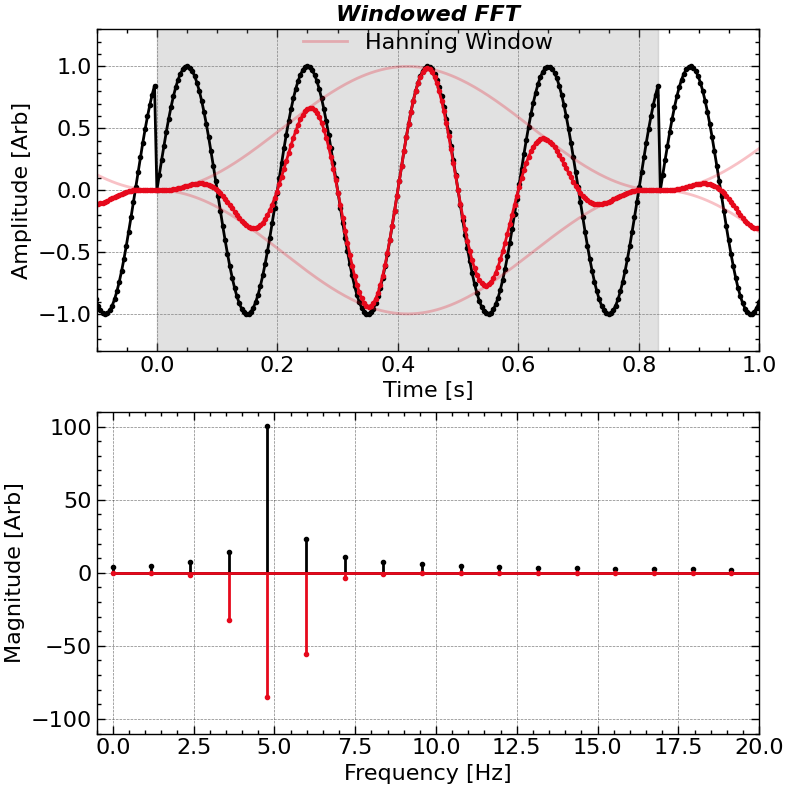

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

n = 2 ** 8
omega0 = 2 * np.pi * 5.

t = np.linspace(0, 1, n, endpoint=False)[:214]
dt = t[1] - t[0]
sig = np.sin(omega0 * t)

ax1.plot(np.concat([t - (t[-1] + dt), t, t + (t[-1] + dt)]), np.concat([sig, sig, sig]), 'ko-')

coefs = np.fft.rfft(sig)
f = np.fft.rfftfreq(len(t), t[1] - t[0])

ax2.stem(f, np.abs(coefs), linefmt = 'k', markerfmt = 'ko', basefmt = 'k-')


sig *= np.hanning(np.size(sig))

ax1.plot(t, np.hanning(np.size(sig)), 'C1-', alpha = 0.25)
ax1.plot(t, -np.hanning(np.size(sig)), 'C1-', alpha = 0.25)

ax1.plot(t - (t.size * dt), np.hanning(np.size(sig)), 'C1-', alpha = 0.25, label = 'Hanning Window')
ax1.plot(t - (t.size * dt), -np.hanning(np.size(sig)), 'C1-', alpha = 0.25)

ax1.plot(t + (t.size * dt), np.hanning(np.size(sig)), 'C1-', alpha = 0.25)
ax1.plot(t + (t.size * dt), -np.hanning(np.size(sig)), 'C1-', alpha = 0.25)
ax1.axvspan(t[0], t[-1], -1.3, 1.3, color = '#888888', alpha = 0.25)

# ax1.plot(time, signal, 'C1o-', label = 'Windowed [Hanning]')

# ax1.plot(np.concat([t - 1, t, t + 1]), np.concat([sig, sig, sig]), 'C1o-', label = 'Windowed [Hanning]')
ax1.plot(np.concat([t - (t[-1] + dt), t, t + (t[-1] + dt)]), np.concat([sig, sig, sig]), 'C1o-')

coefs = np.fft.rfft(sig * np.sqrt(8 / 3))
f = np.fft.rfftfreq(len(t), t[1] - t[0])

ax2.stem(f, -np.abs(coefs), linefmt = 'C1-', markerfmt = 'C1o', basefmt = 'C1-')



ax1.set_ylim(-1.3, 1.3)
ax1.set_title('Windowed FFT', **title_font)

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude [Arb]')

# ax2.set_title(r'${\hat{x}(f)}$')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Magnitude [Arb]')

ax2.set_xlim(-0.5, 20)
ax2.set_ylim(-110, 110)

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.05), loc = 'upper center', ncols = 2)

ax1.set_ylim(-1.3, 1.3)
ax1.set_xlim(-0.1, 1.0)

plt.tight_layout()

# ax2.text(13, 50., 'Spectral Leakage', fontsize=20, ha='center', va='center', rotation=-0, color='grey', alpha=1.0)

# for i in range(0, 20, 1):
#     if i not in [5, 6]:
#         ax2.annotate('', xy=(freq[i], np.abs(coefs[i])), xytext=(freq[i], np.abs(coefs[i]) + 10),
#                         arrowprops=dict(arrowstyle='->', lw=1.5, color='grey', alpha=1.0),
#                         fontsize=20, ha='center', va='center', rotation=-0, color='grey', alpha=1.0)

plt.savefig(save_path + 'figure_dft_spectral_leakage_window' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

omega0 = 2 * np.pi * 5.25

t = np.linspace(0, 1, 200, endpoint=False)
sig = np.sin(omega0 * t)


coefs = np.fft.fft(sig)
f = np.fft.fftfreq(len(t), t[1] - t[0])

pos_mask = f >= 0

ax1.stem(f[pos_mask], np.abs(coefs)[pos_mask], linefmt = 'k', markerfmt = 'ko', basefmt = 'k-')


coefs = np.fft.fft(sig, n = 229)
f = np.fft.fftfreq(len(coefs), t[1] - t[0])

pos_mask = f >= 0

ax2.stem(f[pos_mask], np.abs(coefs)[pos_mask], linefmt = 'k', markerfmt = 'ko', basefmt = 'k-')



for ax in [ax1, ax2]:
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Coefficient')

    ax.set_xlim(-0.5, 20)
    ax.set_ylim(-5, 110)

    ax.grid('on', linestyle = '--')

    _freq = np.linspace(0, 20, 2000)

    ax.plot(_freq, 100 * np.abs(np.sinc(np.abs(_freq - 5.25))), 'C1--', alpha = 1., zorder = -1)

ax1.set_title(r'${\hat{x}(f)}$: ${N=200}$')
ax2.set_title(r'${\hat{x}(f)}$ Zero-Padded: ${N=229}$')

plt.tight_layout()

# plt.savefig(save_path + 'figure_dft_picket_fence_effect' + '.png',bbox_inches='tight',dpi=300)

plt.show()

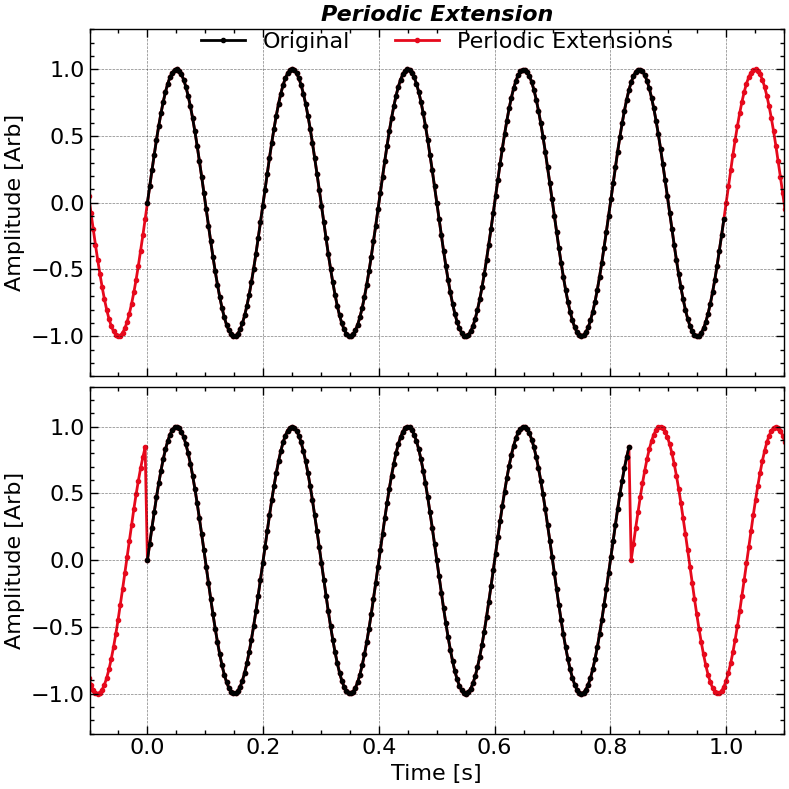

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2, sharex = ax1, sharey = ax1)

n = 2 ** 8
omega0 = 2 * np.pi * 5.0

t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
sig = np.sin(omega0 * t)

ax1.plot(t, sig, 'ko-', label = 'Original')

t = np.concatenate((t - 1, t, t + 1))
sig = np.concatenate((sig, sig, sig))

ax1.plot(t, sig, 'C1o-', label = 'Periodic Extensions', zorder = -1)


t = np.linspace(0, 1, n, endpoint=False)[:214]
sig = np.sin(omega0 * t)

ax2.plot(t, sig, 'ko-', label = 'Original')

t = np.concatenate((t - t.size * dt, t, t + t.size * dt))
sig = np.concatenate((sig, sig, sig))

ax2.plot(t, sig, 'C1o-', label = 'Periodic Extensions', zorder = -1)

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.05), loc = 'upper center', ncols = 2)

ax2.set_xlabel('Time [s]')

ax1.set_ylim(-1.3, 1.3)
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylabel('Amplitude [Arb]')
ax2.set_ylabel('Amplitude [Arb]')

ax1.set_title('Periodic Extension', **title_font)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.tight_layout()


# plt.savefig(save_path + 'figure_dft_periodic_extensions' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

omega = 2 * np.pi * 5.0

sampling_frequencies = np.geomspace(200, 20000, 10, dtype=int)

peak_coefs = []
duration = 1

for sampling_frequency in sampling_frequencies:
    t = np.linspace(0, duration, duration * sampling_frequency, endpoint=False)
    sig = np.sin(omega * t)
    coefs = np.fft.fft(sig)
    f = np.fft.fftfreq(len(t), t[1] - t[0])
    peak_coefs.append(np.max(np.abs(coefs)))

ax1.plot(sampling_frequencies, peak_coefs, 'k.-', label = 'Original')
# ax1.plot(sampling_frequencies, peak_coefs / sampling_frequencies, 'r.-', label = 'Normalized by Sampling Frequency')

sampling_frequency = 200
durations = np.geomspace(1, 100, 10, dtype=int)
peak_coefs = []

for duration in durations:
    t = np.linspace(0, duration, duration * sampling_frequency, endpoint=False)
    sig = np.sin(omega * t)
    coefs = np.fft.fft(sig)
    f = np.fft.fftfreq(len(t), t[1] - t[0])
    peak_coefs.append(np.max(np.abs(coefs)))

ax2.plot(durations, peak_coefs, 'k.-', label = 'Original')
# ax2.plot(durations, peak_coefs / durations, 'r.-', label = 'Normalized by $T$')

ax1.set_title('numpy.fft.fft Coefficients\nversus\nSampling Frequency\n[Length = 1 s]')
ax2.set_title('numpy.fft.fft Coefficients\nversus\nSignal Length\n[Sampling Frequency = 200 Hz]')


for ax in [ax1, ax2]:
    ax.grid('on', linestyle = '--')
    ax.set_xscale('log')
    ax.set_yscale('log')
    # ax.legend(frameon = False, bbox_to_anchor = (0.5, 1.0), loc = 'upper center', ncols = 2)

ax1.set_xlabel('Sampling Frequency [Hz]')
ax2.set_xlabel('Singal Length [s]')

ax1.set_ylabel('Signal: $\mathrm{sin(2\pi \cdot 5 t)}$\nCoefficient at 5 Hz')
# ax2.set_ylabel('Coefficient at 5 Hz')

# ax1.set_ylim(2e-1, 6e4)
# ax2.set_ylim(2e-1, 6e4)

plt.tight_layout()

ax1.text(2e3, 1.5e3, '$\propto f_s$', fontsize=20, ha='center', va='center', rotation=35, color='grey', alpha=1.0)
ax2.text(1e1, 1.5e3, '$\propto T$', fontsize=20, ha='center', va='center', rotation=35, color='grey', alpha=1.0)

# plt.savefig(save_path + 'figure_fft_normalization' + '.png',bbox_inches='tight',dpi=300)

plt.show()

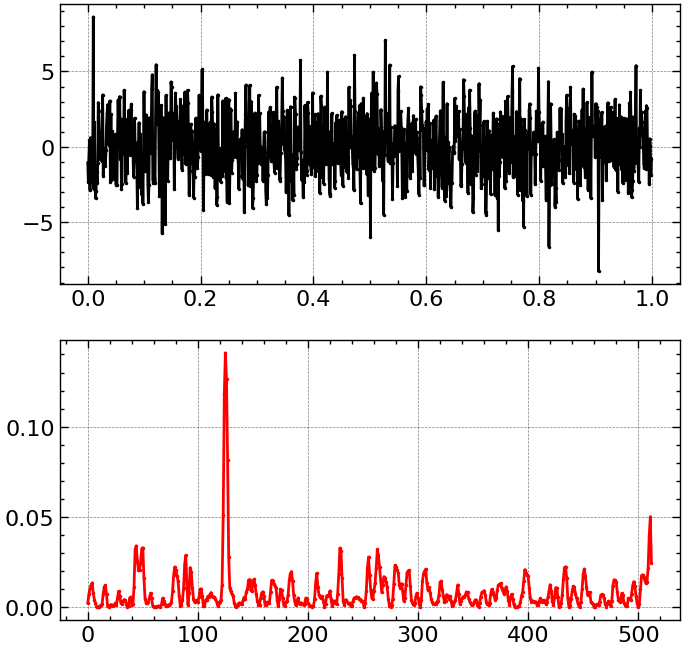

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

omega0 = 2 * np.pi * 125.5
t = np.linspace(0, 1, 2 ** 10, endpoint=False)
fs = 1 / (t[1] - t[0])
sig = 1.0 * np.sin(omega0 * t) * (1 - 4 * (t - 0.5) ** 2)
sig += np.random.randn(t.size) * 2.0

ax1.plot(t, sig, 'k.-', label = 'Original')

f, psd = scipy.signal.welch(sig, fs, window = 'flattop', nperseg=sig.size)
ax2.plot(f, psd, 'r.-', label = 'Welch')
# ax1.hist(psd, bins=np.linspace(0, 0.02, 32), color='k', alpha=0.5, label = 'Histogram')
# ax1.plot(np.linspace(0, 0.02, 32), 100 * np.exp(-np.linspace(0, 0.02, 32) * 50), 'r--')
# ax2.set_yscale('log')
plt.show()

/tmp/ipykernel_1804/2190466278.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(frameon = False, bbox_to_anchor = (0.5, 1.0), loc = 'upper center', ncol = 1)


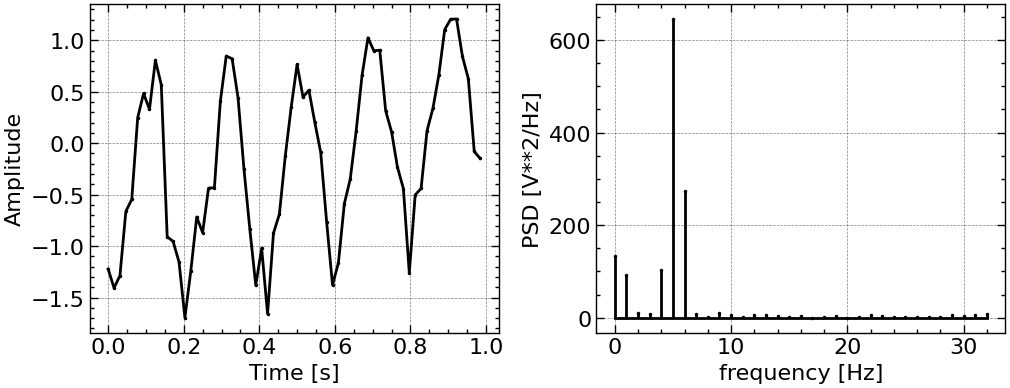

In [4]:
import scipy.signal
%matplotlib ipympl
plt.close()
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega0 = 2 * np.pi * 5

t = np.linspace(0, 1, 2 ** 6, endpoint=False)
omega = np.random.normal(omega0, 0.2 * omega0, t.size)
phase = np.cumsum(omega) * (t[1] - t[0]) + np.random.uniform(0, 2 * np.pi)
sig = 1 * (t ** 2 - 0.5) + np.sin(phase) + np.random.randn(t.size) * 0.2
# x = 1 * np.sin(omega0 * time) + np.random.randn(time.size) * 1.0
fs = 1 / (t[1] - t[0])

ax1.plot(t, sig, 'k.-', label = 'Original')

sig *= np.hanning(np.size(sig)) * np.sqrt(8 / 3)
coefs = np.fft.rfft(sig)
f = np.fft.rfftfreq(len(t), t[1] - t[0])


ax2.stem(f, np.abs(coefs) ** 2, linefmt = 'k', markerfmt = 'k.', basefmt = 'k-')


ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time [s]')

ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel('PSD [V**2/Hz]')

# ax2.set_yscale('log')

ax2.legend(frameon = False, bbox_to_anchor = (0.5, 1.0), loc = 'upper center', ncol = 1)

for ax in [ax1, ax2]:
    ax.grid('on', linestyle = '--')


plt.tight_layout()

plt.show()

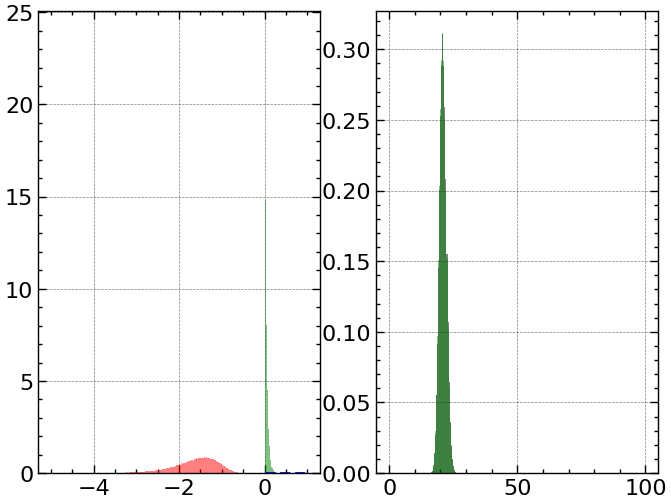

In [3]:
plt.close()
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega0 = 2 * np.pi * 5.0
t = np.linspace(0, 1, 2**7, endpoint=False)
fs = 1 / (t[1] - t[0])

N_SAMPLE = 100000
peak_energy = np.zeros(N_SAMPLE)
noise_energy = np.zeros(N_SAMPLE)

for i in range(N_SAMPLE):
    omega = np.random.normal(omega0, 0.0 * omega0, t.size)
    phase = np.cumsum(omega) * (t[1] - t[0]) + np.random.uniform(
        0, 2 * np.pi)
    sig = 1 * (t**2 - 0.5) + np.sin(phase) + np.random.randn(
        t.size) * 0.2
    sig *= np.hanning(np.size(sig)) * np.sqrt(8 / 3)
    coefs = np.fft.rfft(sig)
    f = np.fft.rfftfreq(len(t), t[1] - t[0])

    noise_energy[i] = (np.abs(coefs)**2)[10] / fs
    peak_energy[i] = (np.abs(coefs)**2)[5] / fs

# h_noise = ax1.hist((noise_energy), bins=np.linspace(0, 1, 256), color='r', alpha=0.5, label = 'Histogram', density = True)
h_noise = ax1.hist(np.log10(noise_energy),
                   bins=np.linspace(-5, 1, 256),
                   color='r',
                   alpha=0.5,
                   label='Histogram',
                   density=True)
h = ax2.hist((peak_energy),
             bins=np.linspace(0, 100, 256),
             color='k',
             alpha=0.5,
             label='Histogram',
             density=True)

lamb = np.mean(noise_energy)

ax1.plot(np.linspace(0, 1, 512),
         h_noise[0][0] * np.exp(-np.linspace(0, 1, 512) / lamb),
         'b--',
         label='Exponential Fit')

phi = np.random.uniform(0, 2 * np.pi, N_SAMPLE)
u = np.random.normal(0, 1, N_SAMPLE) * np.sqrt(lamb / 2)
v = np.random.normal(0, 1, N_SAMPLE) * np.sqrt(lamb / 2)
x0 = 4.58

# x0 = 4.50

ax1.hist((u**2 + v**2),
         bins=np.linspace(0, 1, 256),
         color='g',
         alpha=0.5,
         label='Gaussian Fit',
         density=True)

ax2.hist(x0**2 + 2 * x0 * (u * np.cos(phi) + v * np.sin(phi)) + (u**2 + v**2),
         bins=np.linspace(0, 100, 256),
         color='g',
         alpha=0.5,
         label='Gaussian Fit',
         density=True)

# ax1.set_xlim(0, 1)
plt.show()

In [ ]:
import scipy.signal
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

ax1 = plt.subplot(1, 1, 1)


n = 2 ** 14
N_SEG = 4
omega0 = 2 * np.pi * 500.0
t = np.linspace(0, 1, n, endpoint=False)
sig = 1 * np.sin(omega0 * t) + np.random.randn(t.size) * 0.25

f, psd_mean = scipy.signal.welch(sig, fs, window = 'boxcar', nperseg=n)
ax1.plot(f[1:], psd_mean[1:], label='Original', color = 'k')

f, psd_mean = scipy.signal.welch(sig, fs, window = 'boxcar', nperseg = n / N_SEG, average='mean')
_, psd_median = scipy.signal.welch(sig, fs, window = 'boxcar', nperseg = n / N_SEG, average='median')


ax1.plot(f[1:], psd_mean[1:], label= f'Welch [Mean]\n{N_SEG} Segments', color = 'C0')
ax1.plot(f[1:], psd_median[1:], label=f'Welch [Median]\n{N_SEG} Segments', color = 'C1')

ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('PSD [$\mathrm{Arb^2/Hz}$]')

ax1.set_yscale('log')

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.15), loc = 'upper center', ncol = 3)

ax1.set_xlim(200, 800)

ax1.set_ylim(1e-8, 3e0)
plt.tight_layout()

plt.savefig(save_path + 'figure_welch' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 8))
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3, sharex = ax1, sharey = ax1)
ax4 = plt.subplot(2, 2, 4, sharex = ax2, sharey = ax2)

omega0 = 2 * np.pi * 5.0

t = np.linspace(0, 1, 200, endpoint=False)
fs = 1 / (t[1] - t[0])
sig = np.sin(omega0 * t) + np.sin(omega0 * 3.2 * t) + np.random.randn(t.size) * 0.1

ax1.plot(t, sig, '-', alpha = 0.2)
ax3.plot(t, sig, '-', alpha = 0.2)

coefs = np.fft.rfft(sig)
f = np.fft.rfftfreq(len(t), t[1] - t[0])

ax2.stem(f, np.abs(coefs), linefmt = '', markerfmt = 'o', basefmt = '-')
ax4.stem(f, np.abs(coefs), linefmt = '', markerfmt = 'o', basefmt = '-')

data_miss_idx = np.random.randint(0, 200, 100)
# ax1.plot(time[data_miss_idx], signal[data_miss_idx], 'kx', fillstyle = 'none')

sig[data_miss_idx] = np.nan

ax1.plot(t, sig, 'C1x')

ls_amp = np.abs(scipy.signal.lombscargle(t[~np.isnan(sig)], sig[~np.isnan(sig)], 2 * np.pi * f[1:], normalize='amplitude'))

ax2.stem(f[1:], -ls_amp * f.size, 'C1--', label = 'Lomb-Scargle')

t = np.random.uniform(0, 1, 100)
t.sort()
sig = np.sin(omega0 * t) + np.sin(omega0 * 3.2 * t) + np.random.randn(t.size) * 0.1
ax3.plot(t, sig, 'C1x')


ls_amp = np.abs(scipy.signal.lombscargle(t[~np.isnan(sig)], sig[~np.isnan(sig)], 2 * np.pi * f[1:], normalize='amplitude'))

ax4.stem(f[1:], -ls_amp * f.size, 'C1--', label = 'Lomb-Scargle')


ax1.set_title('Randomly Decimated Uniform Sampling [N = 100]')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')

ax3.set_title('Nonuniform Random Sampling [N = 100]')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Amplitude')

ax2.set_title('Fourier Transform')
ax2.set_xlabel('Frequency [Hz]')
ax4.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Coefficient')
ax4.set_ylabel('Coefficient')

ax2.set_xlim(0, 20)
ax4.set_xlim(0, 20)
ax2.set_ylim(-130, 130)

ax1.legend(frameon = False, bbox_to_anchor = (0.9, 1.1), loc = 'upper center')

plt.tight_layout()


plt.savefig(save_path + 'figure_lombscargle' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

t = np.linspace(0, 1, 500, endpoint=False)
fs = 1 / (t[1] - t[0])
f = np.fft.rfftfreq(len(t), t[1] - t[0])

noise = 0.5
signal_1 = 0 + (t == 0.5).astype(float) + np.random.randn(t.size) * noise
signal_2 = 3 + np.sign(t - 0.5) + np.random.randn(t.size) * noise
signal_3 = 5 + (np.abs(t - 0.5) < 0.1).astype(float) + np.random.randn(t.size) * noise
signal_4 = 8 + (np.abs(t - 0.5) < 0.1).astype(float) * np.sign(t - 0.5) + np.random.randn(t.size) * noise

ax1.plot(t, signal_1, 'k-')
ax1.plot(t, signal_2, 'r-')
ax1.plot(t, signal_3, 'g-')
ax1.plot(t, signal_4, 'b-')


coef_1 = np.fft.rfft(signal_1, axis=-1).T
psd_1 = (np.abs(coef_1) ** 2) / fs / t.size

coef_2 = np.fft.rfft(signal_2, axis=-1).T
psd_2 = (np.abs(coef_2) ** 2) / fs / t.size

coef_3 = np.fft.rfft(signal_3, axis=-1).T
psd_3 = (np.abs(coef_3) ** 2) / fs / t.size

coef_4 = np.fft.rfft(signal_4, axis=-1).T
psd_4 = (np.abs(coef_4) ** 2) / fs / t.size

# ax2.plot(freq, psd_1, 'k.-', label = 'Impulse')
# ax2.plot(freq, psd_2, 'r.-', label = 'Step')
ax2.plot(f, psd_3, 'g.-', label = 'Boxcar')
# ax2.plot(freq, psd_4, 'b.-', label = 'Ramp')

ax2.set_xscale('log')
ax2.set_yscale('log')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

ax1 = plt.subplot(1, 1, 1)

n = 2 ** 13
t = np.linspace(0, 1, n, endpoint=False)
fs = 1 / (t[1] - t[0])
f = np.fft.rfftfreq(len(t), t[1] - t[0])

noise_white = np.random.randn(t.size)

coef_white = np.fft.rfft(noise_white, axis=-1).T
psd_white = (np.abs(coef_white) ** 2) / fs / t.size

noise_brownian_fft = np.fft.rfft(np.random.randn(t.size))
noise_brownian_fft[1:] /= f[1:] ** 1
noise_brownian_fft[0] = 0
noise_brownian = np.fft.irfft(noise_brownian_fft)

coef_brownian = np.fft.rfft(noise_brownian, axis=-1).T
psd_brownian = (np.abs(coef_brownian) ** 2) / fs / t.size

noise_violet_fft = np.fft.rfft(np.random.randn(t.size))
noise_violet_fft[1:] /= f[1:] ** -1
noise_violet_fft[0] = 0
noise_violet = np.fft.irfft(noise_violet_fft)

coef_violet = np.fft.rfft(noise_violet, axis=-1).T
psd_violet = (np.abs(coef_violet) ** 2) / fs / t.size


f, psd_white = scipy.signal.welch(noise_white, fs, nperseg=n)
f, psd_brownian = scipy.signal.welch(noise_brownian, fs, nperseg=n)
f, psd_violet = scipy.signal.welch(noise_violet, fs, nperseg=n)

ax1.plot(f[1:], psd_white[1:], 'k-', label = 'White')
ax1.plot(f[1:], psd_brownian[1:], color = 'brown', linestyle = '-', label = 'Brownian')
ax1.plot(f[1:], psd_violet[1:], color = 'purple', linestyle = '-', label = 'Violet ')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.1), loc = 'upper center', ncol = 5)

ax1.set_xlabel('Freq [Hz]')
ax1.set_ylabel('PSD [$\mathrm{V^2/Hz}$]')

plt.tight_layout()

ax1.text(50, 1e2, '${\propto f^2}$', fontsize=20, rotation = 20, ha='center', va='center', color='purple', alpha=1.0)
ax1.text(50, 3e-12, '${\propto 1/f^{2}}$', fontsize=20, rotation = -20, ha='center', va='center', color='brown', alpha=1.0)
ax1.set_xlim(0.7, 8e3)

plt.savefig(save_path + 'figure_noise' + '.png',bbox_inches='tight',dpi=300)

plt.show()

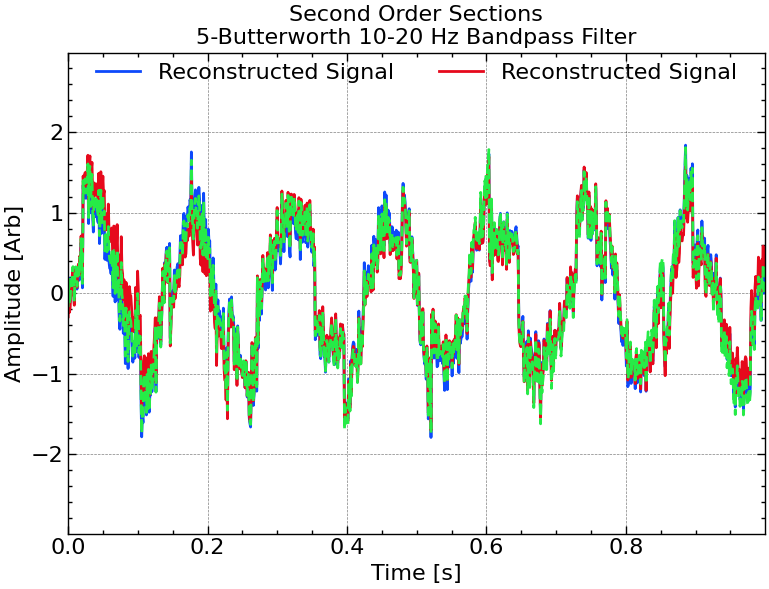

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()
ax1 = plt.subplot(1, 1, 1)
n = 2 ** 10
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt

omega1 = 2 * np.pi * 4
omega2 = 2 * np.pi * 7

sig = np.sin(omega1 * t) + np.sin(omega2 * t) + np.random.randn(t.size) * .2

coef = np.fft.rfft(sig, axis=-1).T
f = np.fft.rfftfreq(len(t), dt)

delta_f = 0.5
coef[(f - omega1 / 2 / np.pi) ** 2 < delta_f ** 2] = 0
filtered_signal = np.fft.irfft(coef, n = n)

ax1.plot(t, filtered_signal, 'C0-', label = 'Reconstructed Signal')

sos = scipy.signal.butter(1, [omega1 / 2 / np.pi - delta_f, omega1 / 2 / np.pi + delta_f], btype = 'bandstop', output='sos', fs = fs)
filtered_signal = scipy.signal.sosfiltfilt(sos, sig)

ax1.plot(t, filtered_signal, 'C1-', label = 'Reconstructed Signal')

ax1.plot(t, sig - np.sin(omega1 * t), 'C2--')


ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.02), loc = 'upper center', ncol = 2)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude [Arb]')
ax1.set_title('Second Order Sections\n5-Butterworth 10-20 Hz Bandpass Filter')
ax1.set_ylim(-2.99, 2.99)

plt.tight_layout()
ax1.autoscale(axis = 'x', tight= True)

# plt.savefig(save_path + 'figure_cut_freq' + '.png',bbox_inches='tight',dpi=300)

plt.show()

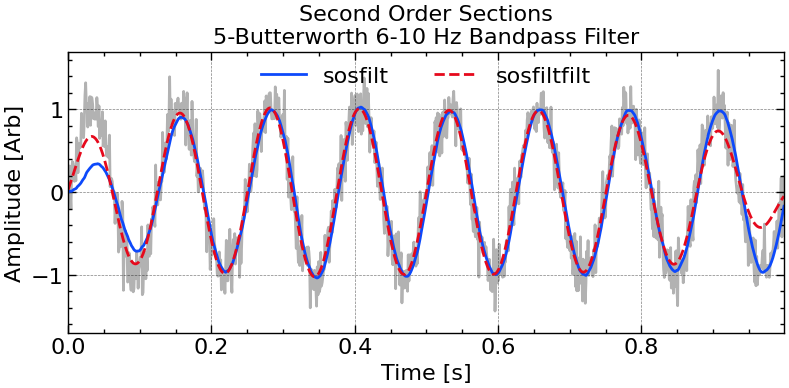

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()
ax1 = plt.subplot(1, 1, 1)
n = 2 ** 10
t = np.linspace(0, 1, n, endpoint=False)
fs = 1 / (t[1] - t[0])
omega = 2 * np.pi * 8.0
sig = np.sin(omega * t) + np.random.randn(t.size) * 0.2

ax1.plot(t, sig, 'k-', alpha = 0.3)

sos = scipy.signal.butter(1, [6, 10], btype = 'bandpass', output='sos', fs = fs)
filtered_signal = scipy.signal.sosfilt(sos, sig)
ax1.plot(t, filtered_signal, 'C0', label = 'sosfilt')

filtered_signal = scipy.signal.sosfiltfilt(sos, sig)
ax1.plot(t, filtered_signal, 'C1', label = 'sosfiltfilt')

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.02), loc = 'upper center', ncol = 2)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude [Arb]')
ax1.set_ylim(-1.7, 1.7)
ax1.set_title('Second Order Sections\n5-Butterworth 6-10 Hz Bandpass Filter')
plt.tight_layout()
ax1.autoscale(axis = 'x', tight= True)

plt.savefig(save_path + 'figure_filtered_signal' + '.png',bbox_inches='tight',dpi=300)

plt.show()

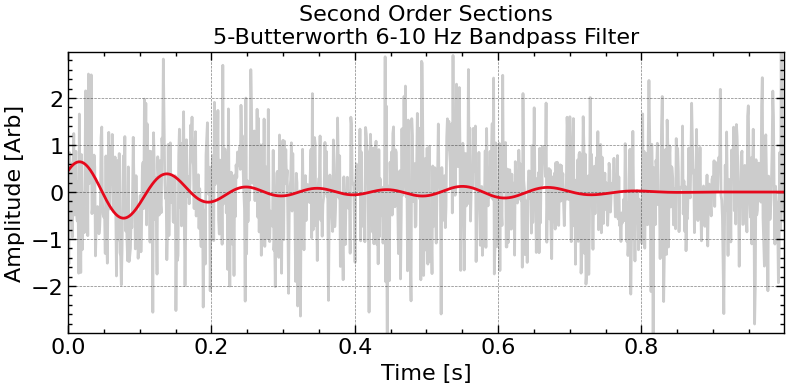

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()
plt.figure(figsize=single_panel_figsize)
ax1 = plt.subplot(1, 1, 1)
n = 2 ** 10
t = np.linspace(0, 1, n, endpoint=False)
fs = 1 / (t[1] - t[0])
sig = np.random.randn(t.size)

ax1.plot(t, sig, 'k-', alpha = 0.2)

sos = scipy.signal.butter(5, [6, 10], btype = 'bandpass', output='sos', fs = fs)

filtered_signal = scipy.signal.sosfiltfilt(sos, sig)
ax1.plot(t, filtered_signal, 'C1-', label = 'Filtered')

ax1.set_title('Second Order Sections\n5-Butterworth 6-10 Hz Bandpass Filter')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude [Arb]')
ax1.set_ylim(-2.99, 2.99)
plt.tight_layout()
ax1.autoscale(axis = 'x', tight= True)
plt.savefig(save_path + 'figure_filtered_noise' + '.png',bbox_inches='tight',dpi=300)

plt.show()

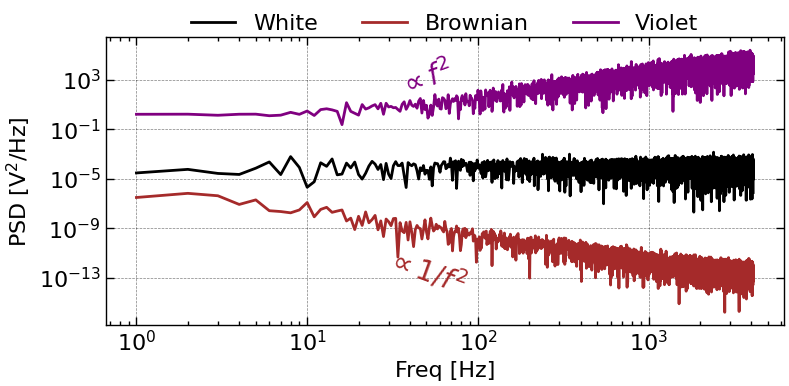

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()
plt.figure(figsize=single_panel_figsize)
ax1 = plt.subplot(1, 1, 1)

n = 2 ** 13
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
f = np.fft.rfftfreq(len(t), t[1] - t[0])

noise_white = np.random.randn(t.size)
coef_white = np.fft.rfft(noise_white, axis=-1).T
psd_white = (np.abs(coef_white) ** 2) / fs / t.size

noise_brownian = np.cumsum(np.random.randn(t.size)) * dt
coef_brownian = np.fft.rfft(noise_brownian, axis=-1).T
psd_brownian = (np.abs(coef_brownian) ** 2) / fs / t.size

noise_violet = np.diff(np.random.randn(t.size + 1)) / dt
coef_violet = np.fft.rfft(noise_violet, axis=-1).T
psd_violet = (np.abs(coef_violet) ** 2) / fs / t.size

ax1.plot(f[1:], psd_white[1:], 'k-', label = 'White')
ax1.plot(f[1:], psd_brownian[1:], color = 'brown', linestyle = '-', label = 'Brownian')
ax1.plot(f[1:], psd_violet[1:], color = 'purple', linestyle = '-', label = 'Violet')

# ax1.plot(freq[1:], np.ones_like(freq[1:]) / fs, 'k--', alpha = 0.5, zorder = 1)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.grid('on', linestyle = '--', alpha = 0.5)

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.15), loc = 'upper center', ncol = 5)

ax1.set_xlabel('Freq [Hz]')
ax1.set_ylabel('PSD [$\mathrm{V^2/Hz}$]')

plt.tight_layout()

ax1.text(50, 1e3, '${\propto f^2}$', fontsize=20, rotation = 20, ha='center', va='center', color='purple', alpha=1.0)
ax1.text(50, 3e-13, '${\propto 1/f^{2}}$', fontsize=20, rotation = -20, ha='center', va='center', color='brown', alpha=1.0)

plt.savefig(save_path + 'figure_noise' + '.png',bbox_inches='tight',dpi=300)

plt.show()

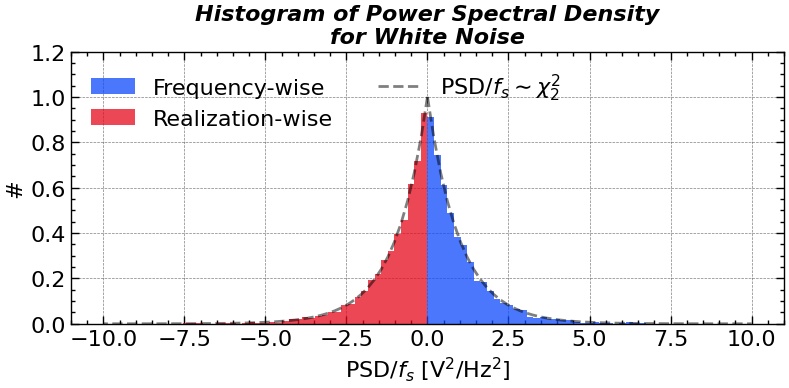

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()
plt.figure(figsize=single_panel_figsize)

ax1 = plt.subplot(1, 1, 1)

n = 2 ** 13
t = np.linspace(0, 1, n, endpoint=False)
fs = 1 / (t[1] - t[0])
f = np.fft.rfftfreq(len(t), t[1] - t[0])

noise_white = np.random.randn(t.size)

coef_white = np.fft.rfft(noise_white, axis=-1).T
psd_white = (np.abs(coef_white) ** 2) / fs / t.size

bins = np.linspace(0, 10, 50)

ax1.hist(psd_white[1:] * fs , bins=bins, color='C0', alpha=0.75, density = True, label = f'Frequency-wise')

N_SAMPLE = int(t.size / 2)
psd_white_at_100_Hz = np.zeros(N_SAMPLE)
for i in range(N_SAMPLE):
    noise_white = np.random.randn(t.size)

    coef_white = np.fft.rfft(noise_white, axis=-1).T
    psd_white = (np.abs(coef_white) ** 2) / fs / t.size
    psd_white_at_100_Hz[i] = psd_white[100 + 1]

ax1.hist(-psd_white_at_100_Hz * fs, bins=-bins[::-1], color='C1', alpha=0.75, density = True, label = 'Realization-wise')

ax1.plot(bins, 1 * np.exp(-bins), 'k--', alpha = 0.5, zorder = 1, label = 'PSD/$f_s \sim \chi_2^2$')
ax1.plot(-bins, 1 * np.exp(-bins), 'k--', alpha = 0.5, zorder = 1)


for ax in [ax1]:

    ax.legend(frameon = False, loc = 'upper left', ncol = 2)

    ax.set_xlabel('PSD/$f_s$ [$\mathrm{V^2/Hz^2}$]')
    ax.set_ylabel('#')

ax1.set_ylim(0, 1.2)
ax1.set_title('Histogram of Power Spectral Density\nfor White Noise', **title_font)
plt.tight_layout()

plt.savefig(save_path + 'figure_noise_hist' + '.png',bbox_inches='tight',dpi=300)

plt.show()

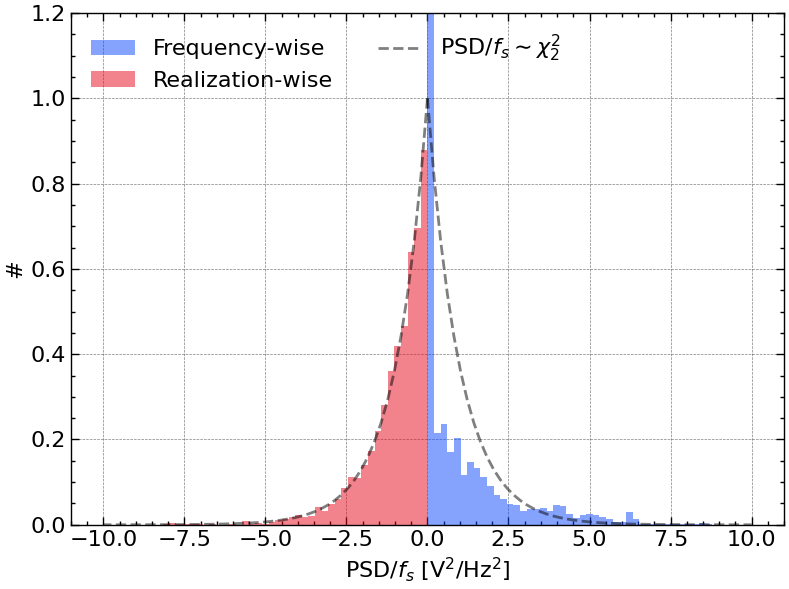

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import ssqueezepy

plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

ax1 = plt.subplot(1, 1, 1)

n = 2 ** 13
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
f = np.fft.rfftfreq(len(t), t[1] - t[0])

noise_white = np.random.randn(t.size)

bandwidth = 6.0
scales = np.geomspace(30, fs * 600, 128)

coef_bx, scales = ssqueezepy.cwt(noise_white, ('morlet', {'mu': bandwidth}), scales = bandwidth / (2 * np.pi) * scales.astype(np.float32), fs = 1 / dt, l1_norm = False)
psd_white = np.abs(coef_bx) ** 2
psd_white /= np.mean(psd_white, axis=(0, 1), keepdims=True)

bins = np.linspace(0, 10, 50)

ax1.hist(psd_white[:, 3000:-3000].flatten() , bins=bins, color='C0', alpha=0.5, density = True, label = f'Frequency-wise')

N_SAMPLE = int(t.size / 2)
psd_white_at_100_Hz = np.zeros(N_SAMPLE)
for i in range(N_SAMPLE):
    noise_white = np.random.randn(t.size)

    coef_white = np.fft.rfft(noise_white, axis=-1).T
    psd_white = (np.abs(coef_white) ** 2) / fs / t.size
    psd_white_at_100_Hz[i] = psd_white[100 + 1]

ax1.hist(-psd_white_at_100_Hz * fs, bins=-bins[::-1], color='C1', alpha=0.5, density = True, label = 'Realization-wise')

ax1.plot(bins, 1 * np.exp(-bins), 'k--', alpha = 0.5, zorder = 1, label = 'PSD/$f_s \sim \chi_2^2$')
ax1.plot(-bins, 1 * np.exp(-bins), 'k--', alpha = 0.5, zorder = 1)


for ax in [ax1]:

    ax.legend(frameon = False, loc = 'upper left', ncol = 2)

    ax.set_xlabel('PSD/$f_s$ [$\mathrm{V^2/Hz^2}$]')
    ax.set_ylabel('#')

ax1.set_ylim(0, 1.2)

plt.tight_layout()


# plt.savefig(save_path + 'figure_noise_hist' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
coef_bx, scales = ssqueezepy.cwt(noise_white, ('morlet', {'mu': bandwidth}), scales = bandwidth / (2 * np.pi) * scales.astype(np.float32), fs = 1 / dt, l1_norm = False)
psd_white = np.abs(coef_bx) ** 2
psd_white /= np.mean(psd_white, axis=(0, 1), keepdims=True)
psd_white.shape

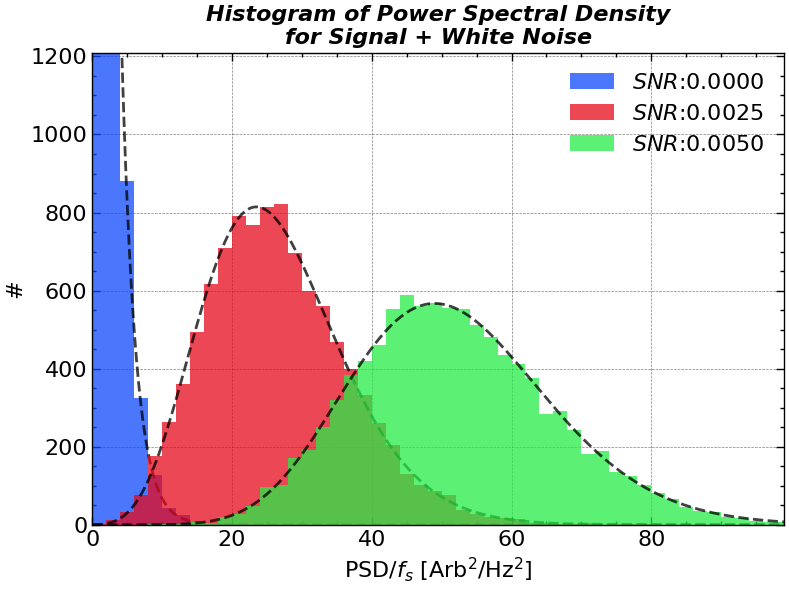

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()
ax1 = plt.subplot(1, 1, 1)

n = 10000

t = np.linspace(0, 1, n, endpoint=False)
fs = 1 / (t[1] - t[0])

omega = 2 * np.pi * 100
f = np.fft.rfftfreq(len(t), t[1] - t[0])
freq_idx = np.where(f == omega / (2 * np.pi))[0][0]

bins = np.linspace(0, 400.0, 200, endpoint=False)
bin_width = bins[1] - bins[0]
fined_bins = np.linspace(0, 400, 20000)[1:]


N_SAMPLE = 10000
psd_at_wave_frequency = np.zeros(N_SAMPLE)
amp_signal = [0.00, 0.07, 0.10]
amp_noise = [1.00, 1.00, 1.00]

for i in range(3):
    for j in range(N_SAMPLE):
        sig = amp_signal[i] * np.sin(omega * t) + amp_noise[i] * np.random.randn(t.size)
        _, psd = scipy.signal.welch(sig, fs, window='boxcar', nperseg=n)
        psd_at_wave_frequency[j] = psd[freq_idx]
    ax1.hist(psd_at_wave_frequency * fs, bins = bins, alpha=0.75, label = "$\mathit{SNR}$:" + f"{(amp_signal[i] / amp_noise[i]) ** 2 / 2:.4f}")
    # ax1.hist(psd_at_wave_frequency * fs, bins = bins, alpha=0.75)

    # fit_result = scipy.stats.ncx2.fit(psd_at_wave_frequency * fs, method = 'MLE', fdf = 2, floc = 0)
    # print(fit_result)
    # ax1.plot(fined_bins, N_SAMPLE * bin_width * scipy.stats.ncx2.pdf(fined_bins, *fit_result), 'k--', alpha = 0.75, zorder = 1)
    # (x, df, nc, loc, scale)
    nc = (amp_signal[i] ** 2 / 2) * n
    scale = amp_noise[i] ** 2
    # print(nc, scale)
    ax1.plot(fined_bins, N_SAMPLE * bin_width * scipy.stats.ncx2.pdf(fined_bins, df = 2, nc = nc, loc = 0, scale = scale), 'k--', alpha = 0.75, zorder = 1)
    
ax1.legend(frameon = False, loc = 'upper right', ncol = 1)

ax1.set_xlabel('PSD/$f_s$ [$\mathrm{Arb^2/Hz^2}$]')
ax1.set_ylabel('#')

# ax1.set_xlim(0, 68)
# ax1.set_yscale('symlog', linthresh = 1e1)
# ax1.set_ylim(1e0, 1e4)

ax1.set_ylim(0, 1210)
ax1.set_xlim(0, 99)

# ax1.set_title('Signal Over Noise PSD', **title_font)
ax1.set_title('Histogram of Power Spectral Density\nfor Signal + White Noise', **title_font)

plt.tight_layout()
plt.savefig(save_path + 'figure_signal_over_noise_hist' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()
plt.cla()
plt.clf()
plt.figure(figsize=single_panel_figsize)
ax1 = plt.subplot(1, 1, 1)

n = 2 ** 14
t = np.linspace(0, 1, n, endpoint=False)
fs = 1 / (t[1] - t[0])
f = np.fft.rfftfreq(len(t), t[1] - t[0])

N_PER_SEG = 2 ** 13
window = 'boxcar'
noise_white = np.random.randn(t.size)

coef_white = np.fft.rfft(noise_white, axis=-1).T
psd_white = (np.abs(coef_white) ** 2) / fs / t.size
psd_white[1:] *= 2  # Adjust for one-sided spectrum

freq_welch, psd_white_welch = scipy.signal.welch(noise_white, fs, window = window, nperseg=N_PER_SEG)

noise_brownian_fft = np.fft.rfft(np.random.randn(t.size))
noise_brownian_fft[1:] /= f[1:] ** 1
noise_brownian_fft[0] = 0
noise_brownian = np.fft.irfft(noise_brownian_fft)

coef_brownian = np.fft.rfft(noise_brownian, axis=-1).T
psd_brownian = (np.abs(coef_brownian) ** 2) / fs / t.size
psd_brownian[1:] *= 2  # Adjust for one-sided spectrum

freq_welch, psd_brownian_welch = scipy.signal.welch(noise_brownian, fs, window = window, nperseg=N_PER_SEG)

noise_violet_fft = np.fft.rfft(np.random.randn(t.size))
noise_violet_fft[1:] /= f[1:] ** -1
noise_violet_fft[0] = 0
noise_violet = np.fft.irfft(noise_violet_fft)

coef_violet = np.fft.rfft(noise_violet, axis=-1).T
psd_violet = (np.abs(coef_violet) ** 2) / fs / t.size
psd_violet[1:] *= 2  # Adjust for one-sided spectrum

freq_welch, psd_violet_welch = scipy.signal.welch(noise_violet, fs, window = window, nperseg=N_PER_SEG)

ax1.plot(f[1:], psd_white[1:], 'k-', alpha = 0.3)
ax1.plot(f[1:], psd_brownian[1:], color = 'brown', linestyle = '-', alpha = 0.3)
ax1.plot(f[1:], psd_violet[1:], color = 'purple', linestyle = '-', alpha = 0.3)

ax1.plot(freq_welch[1:], psd_white_welch[1:], 'k-', label = 'White')
ax1.plot(freq_welch[1:], psd_brownian_welch[1:], color = 'brown', linestyle = '-', label = 'Brownian')
ax1.plot(freq_welch[1:], psd_violet_welch[1:], color = 'purple', linestyle = '-', label = 'Violet ')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.1), loc = 'upper center', ncol = 5)

ax1.set_xlabel('Freq [Hz]')
ax1.set_ylabel('PSD [$\mathrm{Arb^2/Hz}$]')

plt.tight_layout()

ax1.set_xlim(0.7, 8e3)

# ax1.set_title('Welch Method', y = 1.05)
# plt.savefig(save_path + 'figure_noise_welch' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scienceplots

plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()
plt.cla()
plt.clf()
ax1 = plt.subplot(1, 1, 1)

n = 2 ** 14
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
f = np.fft.rfftfreq(len(t), t[1] - t[0])

noise_white = np.random.randn(t.size)
coef_white = np.fft.rfft(noise_white, axis=-1).T
psd_white = (np.abs(coef_white) ** 2) / fs / t.size

noise_brownian_fft = np.fft.rfft(np.random.randn(t.size))
noise_brownian_fft[1:] /= f[1:] ** 1
noise_brownian_fft[0] = 0
noise_brownian = np.fft.irfft(noise_brownian_fft)

f, psd_brownian = scipy.signal.welch(noise_brownian, fs, window = 'boxcar', nperseg=n)

ax1.plot(f[1:], psd_brownian[1:], color = 'brown', linestyle = '-', alpha = 0.3)

acf = np.correlate(noise_brownian, noise_brownian, mode='full') / n  # unbiased normalization
acf *= np.bartlett(len(acf))

# From single-sided to two-sided
acf = 2 * acf[acf.size // 2:]
acf[0] *= 0.5

psd = 2 * np.real(np.fft.rfft(acf)) / fs
f = np.fft.rfftfreq(len(acf), dt)

ax1.plot(f[1::], psd[1::], 'brown', label = 'Blackman-Tukey Method\nBrownian [Bartlett Window]')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.18), loc = 'upper center', ncol = 5)

ax1.set_xlabel('Freq [Hz]')
ax1.set_ylabel('PSD [$\mathrm{Arb^2/Hz}$]')

plt.tight_layout()

ax1.set_xlim(0.7, 8e3)

# ax1.set_title('Welch Method', y = 1.05)
plt.savefig(save_path + 'figure_noise_blackman_tukey' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.signal
import scienceplots
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

# 连接IRIS服务
client = Client("IRIS")

starttime = UTCDateTime("2008-05-12T06:30:00")
endtime = UTCDateTime("2008-05-12T06:45:00")
# 下载波形数据（垂向BHZ）
st = client.get_waveforms(
    network="IC", station="WMQ", location="00", channel="BHZ",
    starttime=starttime,
    endtime=endtime
)


# 下载台站元数据（响应信息）
inv = client.get_stations(
    network="IC", station="WMQ", level="response",
    starttime=starttime,
    endtime=endtime
)
st.remove_response(inventory=inv, output="VEL")  


%matplotlib ipympl
plt.close()
plt.cla()
plt.clf()

ax1 = plt.subplot(1, 1, 1)
dt = 1 / st.traces[0].stats.sampling_rate
t = np.datetime64(starttime) + (np.arange(0, len(st[0].data)).astype(float) * dt * 1e3).astype('timedelta64[ms]')
ax1.plot(t, st[0].data * 1e3, 'k-')
ax1.set_ylim(-6.99, 7)
ax1.set_xlabel('Time')
ax1.set_ylabel('Velocity [mm/s]')
ax1.set_title('Broadband High-Gain Vertical Seismometer\n' + f"{st[0].id}")
ax1.autoscale(axis = 'x', tight = True)
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))
plt.show()

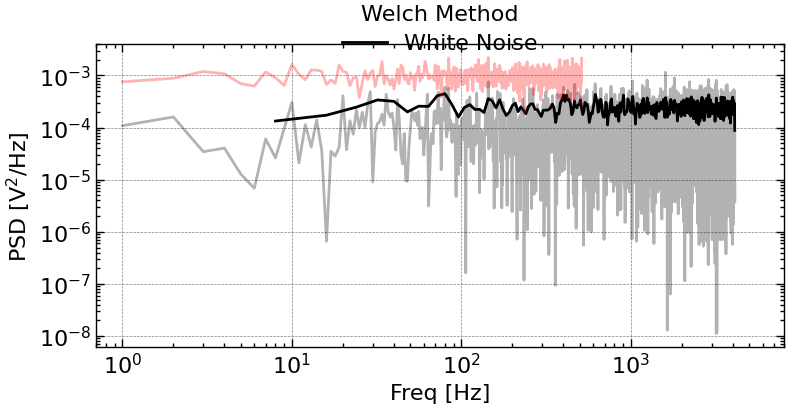

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=single_panel_figsize)

ax1 = plt.subplot(1, 1, 1)

t = np.linspace(0, 1, 2 ** 13, endpoint=False)
fs = 1 / (t[1] - t[0])
f = np.fft.rfftfreq(len(t), t[1] - t[0])

N_PER_SEG = 2 ** 10
window = 'hann'
noise_white = np.random.randn(t.size)

coef_white = np.fft.rfft(noise_white, axis=-1).T
psd_white = (np.abs(coef_white) ** 2) / fs / t.size

freq_welch, psd_white_welch = scipy.signal.welch(noise_white, fs, window = window, nperseg=N_PER_SEG)

N_DOWNSAMPLE = 2 ** 3
time_downsampled = t[::N_DOWNSAMPLE]
dt_downsampled = time_downsampled[1] - time_downsampled[0]
fs_downsampled = 1 / dt_downsampled
freq_downsampled = np.fft.rfftfreq(len(time_downsampled), dt_downsampled)

psd_downsampled = np.zeros(freq_downsampled.size, dtype = float)

for i in range(N_DOWNSAMPLE):
    _coef = np.fft.rfft(noise_white[i::N_DOWNSAMPLE], axis=-1).T
    _psd = (np.abs(_coef) ** 2) / fs_downsampled / time_downsampled.size
    psd_downsampled += _psd / N_DOWNSAMPLE

ax1.plot(f[1:], psd_white[1:], 'k-', alpha = 0.3)

ax1.plot(freq_welch[1:], psd_white_welch[1:], 'k-', label = 'White Noise')

ax1.plot(freq_downsampled[1:], psd_downsampled[1:], 'r-', alpha = 0.3)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.grid('on', linestyle = '--', alpha = 0.5)

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.1), loc = 'upper center', ncol = 5)

ax1.set_xlabel('Freq [Hz]')
ax1.set_ylabel('PSD [$\mathrm{V^2/Hz}$]')

plt.tight_layout()

ax1.set_xlim(0.7, 8e3)

ax1.set_title('Welch Method', y = 1.05)
# plt.savefig(save_path + 'figure_noise_welch' + '.png',bbox_inches='tight',dpi=300)

plt.show()

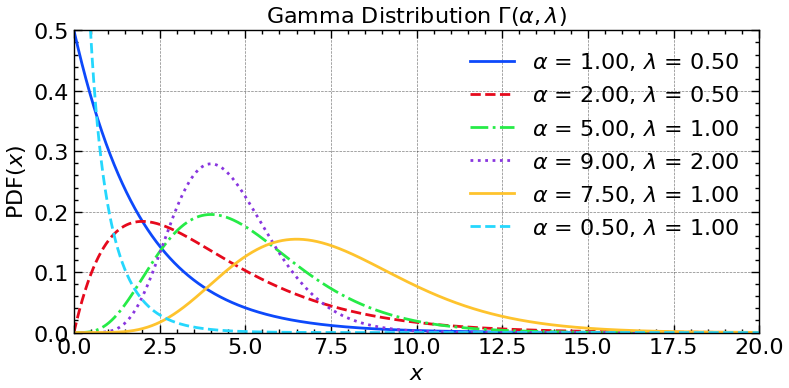

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.stats
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

plt.figure(figsize=single_panel_figsize)
ax1 = plt.subplot(1, 1, 1)
sig = np.linspace(0, 20, 100000, endpoint=False)

parameters = [(1.0, 2.0), (2.0, 2.0), (5.0, 1.0), (9.0, 0.5), (7.5, 1.0), (0.5, 1.0)]
colors = ['r', 'orange', 'yellow', 'lime', 'k', 'blue', 'm']

for i in np.arange(len(parameters)):
    alpha = parameters[i][0]
    theta = parameters[i][1]
    color = colors[i]
    pdf = scipy.stats.gamma.pdf(sig, alpha, 0, theta)
    pdf[pdf == 0] = np.nan
    # ax1.plot(x, pdf, color = color, linestyle = '-', label = r"$\alpha$ = %.2f, $\lambda$ = %.2f" % (alpha, 1 / theta))
    ax1.plot(sig, pdf, color = f"C{i}", label = r"$\alpha$ = %.2f, $\lambda$ = %.2f" % (alpha, 1 / theta))

ax1.legend(frameon = False, loc = 'upper right')

ax1.set_ylim(0, 0.5)
ax1.set_xlim(0, 20)

ax1.set_xlabel('$x$')
ax1.set_ylabel(r'PDF(${x}$)')

ax1.set_title(r'Gamma Distribution $\Gamma(\alpha,\lambda)$')

plt.tight_layout()

plt.savefig(save_path + 'figure_gamma_distribution' + '.png',bbox_inches='tight',dpi=300)

plt.show()

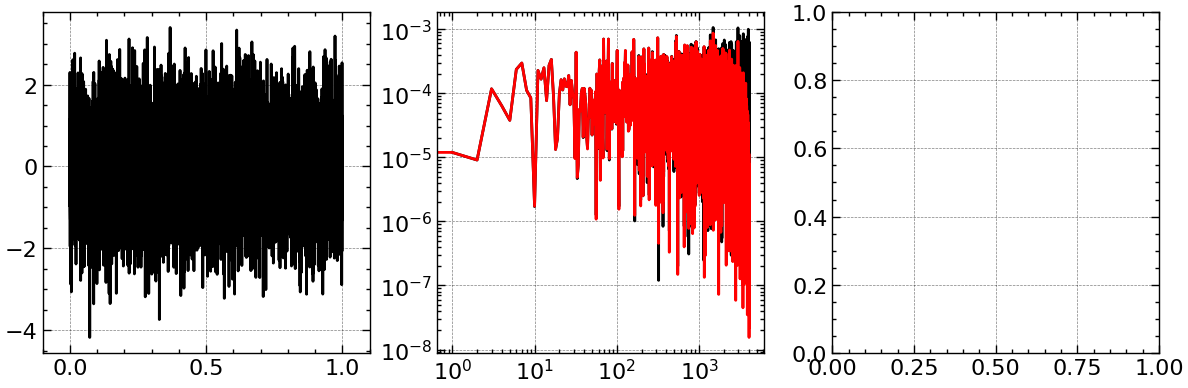

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.stats
%matplotlib ipympl
plt.close()

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

omega = 2 * np.pi * 25.0
t = np.linspace(0, 1, 2 ** 13, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
f = np.fft.rfftfreq(len(t), dt)

sig = np.sin(omega * t) * 0.0 + np.random.randn(t.size) * 1.0

coef = np.fft.rfft(sig, axis=-1).T
psd = (np.abs(coef) ** 2) / fs / t.size

ax1.plot(t, sig, 'k-')
ax1.set_xlim(-0.1, 1.1)

ax2.plot(f[1:], psd[1:], 'k-', label = 'FFT')

acfs = np.correlate(sig, sig, mode='full') / sig.size
# acfs = acfs[signal.size - 1:] / signal.size

ax2.plot(f[:-1], np.real(np.fft.rfft(acfs))[::2] / fs, 'r-', label = 'ACF')

ax2.set_yscale('log')
ax2.set_xscale('log')

for ax in [ax1, ax2, ax3]:
    ax.grid('on', linestyle = '--', alpha = 0.5)
plt.tight_layout()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

ax1 = plt.subplot(1, 1, 1)

omega = 2 * np.pi * 8.0
t = np.linspace(0, 1, 2 ** 7, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
sig = np.sin(omega * t) * (0.1 + np.hanning(t.size)) + np.random.randn(t.size) * 0.0

ax1.plot(t, sig, 'ko-')

ax1.plot(t, scipy.signal.hilbert(sig).real, 'r--', label = 'Real', alpha = 0.5)
ax1.plot(t, scipy.signal.hilbert(sig).imag, 'b--', label = 'Imaginary', alpha = 0.5)
ax1.plot(t, np.abs(scipy.signal.hilbert(sig)), 'k--', label = 'Magnitude', alpha = 0.5)
ax1.plot(t, -np.abs(scipy.signal.hilbert(sig)), 'k--', alpha = 0.5)

ax1.set_xlim(-0.0, 1.0)

for ax in [ax1]:
    ax.grid('on', linestyle = '--', alpha = 0.5)

ax1.legend(frameon = False, loc = 'upper center', ncol = 3, bbox_to_anchor = (0.5, 1.1))

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude [Arb]')
ax1.set_title('Hilbert Transform', y = 1.05)

plt.tight_layout()

# plt.savefig(save_path + 'figure_hilbert' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition

import scipy.signal
import scienceplots

plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

plt.figure(figsize=(8, 8))

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2, sharex = ax1, sharey = ax1)

n = 2 ** 10
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
omega = 2 * np.pi * 8.0

signal_x = np.sin(omega * t + np.pi * 0.0) * (0.6 * np.hanning(t.size)) + np.random.randn(t.size) * 0.02
signal_y = np.sin(omega * t + np.pi * 0.5) * (0.7 * np.hanning(t.size)) + np.random.randn(t.size) * 0.02
signal_z = np.sin(omega * t + np.pi * 1.0) * (0.8 * np.hanning(t.size)) + np.random.randn(t.size) * 0.02

ax1.plot(t, signal_x)
ax1.plot(t, signal_y)
ax1.plot(t, signal_z)

sig = np.vstack((signal_x, signal_y, signal_z)).T
pca = sklearn.decomposition.PCA(n_components=3)
pca.fit(sig)

singular_values_ = (pca.singular_values_)

ax2.plot(t, pca.transform(sig)[:, 0], label = "$\mathbf{n_1}=$" + f"{np.array2string(pca.components_[0], separator = ', ', formatter={'float': lambda x: f'{x: .1f}'})}")
ax2.plot(t, pca.transform(sig)[:, 1], label = "$\mathbf{n_2}=$" + f"{np.array2string(pca.components_[1], separator = ', ', formatter={'float': lambda x: f'{x: .1f}'})}")
ax2.plot(t, pca.transform(sig)[:, 2], label = "$\mathbf{n_3}=$" + f"{np.array2string(pca.components_[2], separator = ', ', formatter={'float': lambda x: f'{x: .1f}'})}")

ax2.text(0.98, -1.1, f'Singular Values: {np.array2string(singular_values_, separator = ", ", formatter={"float": lambda x: f"{x: .1f}"})}', ha = 'right', va = 'top', fontsize = 10)

ax2.legend(frameon = False, loc = 'upper right', ncols = 1, fontsize = 10, facecolor = 'white', edgecolor = 'black')
ax2.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude [Arb]')
ax2.set_ylabel('Amplitude [Arb]')

ax1.autoscale(axis = 'x', tight = True)
ax2.autoscale(axis = 'x', tight = True)

ax1.set_ylim(-1.3, 1.3)
ax1.set_title('Raw Signals')
ax2.set_title('PCA/MVA Transformed Signals')

plt.tight_layout()

plt.savefig(save_path + 'figure_pca' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega0 = 2 * np.pi * 5.5
omega1 = 2 * np.pi * 50.5
t = np.linspace(0, 1, 2 ** 7, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
sig = np.sin(omega0 * t) + 0.5 * np.sin(omega1 * t) + np.random.randn(t.size) * 0.01

ax1.plot(t, sig, 'k-')

sig *= np.hanning(np.size(sig)) * np.sqrt(8 / 3)
coefs = np.fft.rfft(sig, axis=-1).T
psd = (np.abs(coefs) ** 2) / fs / t.size
f = np.fft.rfftfreq(len(t), dt)
ax2.plot(f[1:], psd[1:], 'k-', label = 'FFT')

ax2.set_yscale('log')

plt.show()

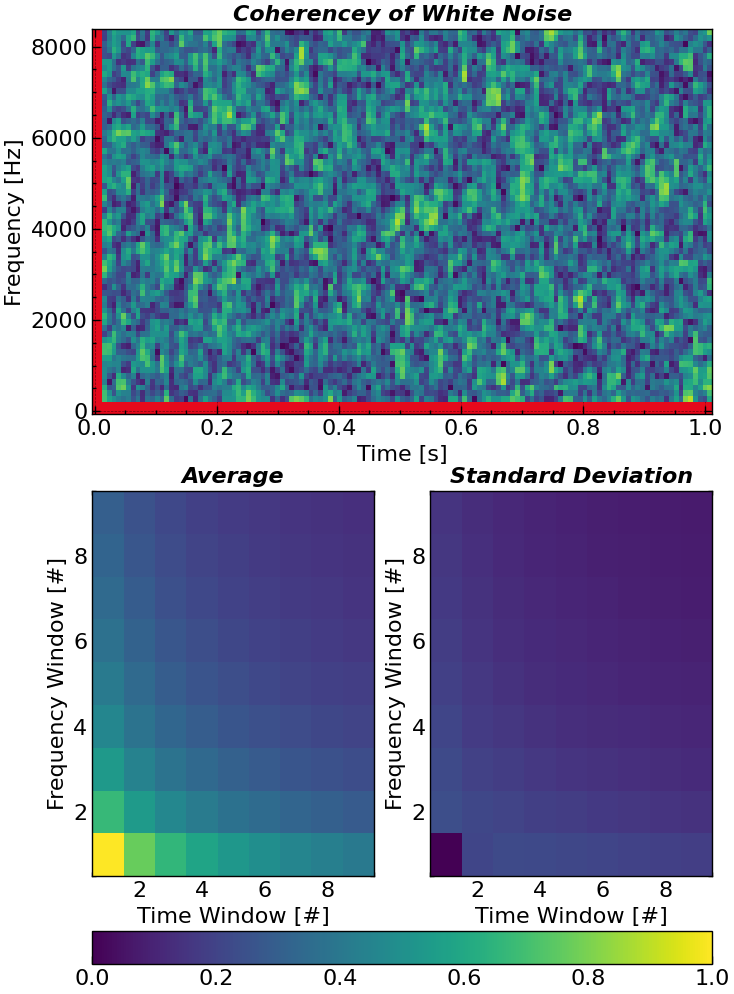

In [ ]:
plt.close()

plt.figure(figsize=(8, 11))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 2, 3)
ax3 = plt.subplot(2, 2, 4, sharex=ax2, sharey=ax2)

n = 2**14
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
sig = np.random.normal(0, 1, (n, 3))
bins = np.linspace(0, 100, 100) * dt

window = 128
step = window
mfft = 1 * window

hann_window = scipy.signal.windows.hann(window,
                                        sym=True)  # symmetric Gaussian window
STFT = scipy.signal.ShortTimeFFT(hann_window,
                                 hop=step,
                                 fs=fs,
                                 scale_to='magnitude',
                                 fft_mode='onesided2X',
                                 mfft=mfft)  # create the STFT object
stft_coef = STFT.stft(sig[:, :], axis=0)  # perform the STFT
stft_coef = stft_coef.transpose((2, 0, 1))  # Transpose to (Nf, Nt, Nch) format
stft_matrix = np.einsum(
    'ijk, ijl -> ijkl', stft_coef,
    stft_coef.conj())  # Compute the outer product of the coefficients

tmin, tmax, fmin, fmax = STFT.extent(n)

t = np.linspace(tmin, tmax, stft_matrix.shape[0])
f = np.linspace(fmin, fmax, stft_matrix.shape[1])

avg_stft_matrix = np.copy(stft_matrix)
time_window = 3
freq_window = 3

avg_stft_matrix = bn.move_mean(avg_stft_matrix,
                               time_window,
                               min_count=time_window,
                               axis=0)
avg_stft_matrix = bn.move_mean(avg_stft_matrix,
                               freq_window,
                               min_count=freq_window,
                               axis=1)

coherency = np.abs(avg_stft_matrix[:, :, 0, 1]) / np.sqrt(
    np.abs(avg_stft_matrix[:, :, 0, 0] * avg_stft_matrix[:, :, 1, 1]))
ax1.pcolormesh(t, f, coherency.T, cmap='viridis', vmax=1.0, vmin=0.0)
ax1.set_facecolor('C1')

N_TIME_WINDOW = 10
N_FREQ_WINDOW = 10
avg_coherency = np.zeros((N_TIME_WINDOW, N_FREQ_WINDOW))
std_coherency = np.zeros((N_TIME_WINDOW, N_FREQ_WINDOW))

for time_window in np.arange(N_TIME_WINDOW):
    for freq_window in np.arange(N_FREQ_WINDOW):
        avg_stft_matrix = np.copy(stft_matrix)
        if time_window != 0:
            avg_stft_matrix = bn.move_mean(avg_stft_matrix,
                                           time_window,
                                           min_count=time_window,
                                           axis=0)
        if freq_window != 0:
            avg_stft_matrix = bn.move_mean(avg_stft_matrix,
                                           freq_window,
                                           min_count=freq_window,
                                           axis=1)

        avg_coherency[time_window, freq_window] = np.nanmean(
            np.abs(avg_stft_matrix[:, :, 0, 1]) / np.sqrt(
                np.abs(avg_stft_matrix[:, :, 0, 0] *
                       avg_stft_matrix[:, :, 1, 1])))
        std_coherency[time_window, freq_window] = np.nanstd(
            np.abs(avg_stft_matrix[:, :, 0, 1]) / np.sqrt(
                np.abs(avg_stft_matrix[:, :, 0, 0] *
                       avg_stft_matrix[:, :, 1, 1])))

ax2.pcolormesh(np.arange(N_TIME_WINDOW),
               np.arange(N_FREQ_WINDOW),
               avg_coherency,
               cmap='viridis',
               vmax=1.0,
               vmin=0.0)
pc = ax3.pcolormesh(np.arange(N_TIME_WINDOW),
                    np.arange(N_FREQ_WINDOW),
                    std_coherency,
                    cmap='viridis',
                    vmax=1.0,
                    vmin=0.0)

ax2.set_xlim(0.5, N_TIME_WINDOW - 0.5)
ax2.set_ylim(0.5, N_FREQ_WINDOW - 0.5)

ax1.set_title('Coherencey of White Noise', **title_font)
ax2.set_title('Average', **title_font)
ax3.set_title('Standard Deviation', **title_font)

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Frequency [Hz]')
ax2.set_xlabel('Time Window [#]')
ax2.set_ylabel('Frequency Window [#]')
ax3.set_xlabel('Time Window [#]')
ax3.set_ylabel('Frequency Window [#]')

ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax3.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax3.yaxis.set_major_locator(ticker.MultipleLocator(2))

cbar_ax = plt.gcf().add_axes([
    ax2.get_position().x0,
    ax2.get_position().y0 - 0.08,
    ax3.get_position().x1 - ax2.get_position().x0, 0.03
])
plt.colorbar(pc, cax=cbar_ax, orientation='horizontal')

# plt.savefig(save_path + 'figure_coherency' + '.png', bbox_inches='tight', dpi=300)

plt.show()

/tmp/ipykernel_1804/3670033135.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


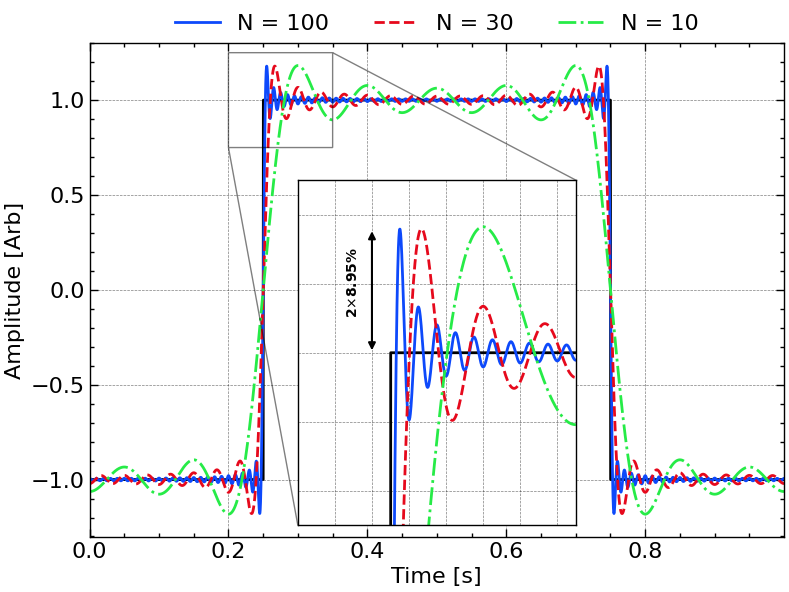

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()
plt.gcf()
plt.gca()

ax1 = plt.subplot(1, 1, 1)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax1ins = inset_axes(ax1, width="40%", height="70%", loc="lower center")

t = np.linspace(0, 1, 2 ** 13, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
omega = 2 * np.pi * 1.0
sig = -np.sign(np.cos(omega * t) * 1.0)

coef = np.fft.rfft(sig)


ax1.plot(t, sig, 'k-')
ax1ins.plot(t, sig, 'k-', label = 'Signal')

for order in [10, 30, 100][::-1]:
    reconstructed_signal = np.fft.irfft(coef * (np.arange(coef.size) < order))
    ax1.plot(t, reconstructed_signal, label = f"N = {order}")
    ax1ins.plot(t, reconstructed_signal, label = 'Reconstructed Signal (FFT)')

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.10), loc = 'upper center', ncol = 4)

ax1ins.set_ylim(0.75, 1.25)
ax1ins.set_xlim(0.20, 0.35)

ax1.indicate_inset_zoom(ax1ins, edgecolor="black")

plt.setp(ax1ins.get_xticklabels(), visible=False)
plt.setp(ax1ins.get_yticklabels(), visible=False)

ax1ins.grid('on')

ax1ins.tick_params(axis='both', which='both', length=0, labelsize=8)

ax1ins.annotate('', arrowprops=dict(arrowstyle="<|-|>, head_width = 0.3, head_length = 0.6", color='black', lw=1.5),
            xy=(0.24, 1.18), xytext=(0.24, 0.98),
            ha='center', va='bottom',
            color='black', weight='bold',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
ax1ins.text(0.23, 1.05, r'2$\times$8.95%', ha='center', va='bottom', color='black', weight='bold', rotation = 90, fontsize = 10)

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude [Arb]')
ax1.autoscale(axis = 'x', tight=True)

plt.tight_layout()
plt.savefig(save_path + 'figure_gibbs' + '.png',bbox_inches='tight',dpi=300)

plt.show()

/tmp/ipykernel_1804/4239531083.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.15), loc = 'upper center', ncol = 4)


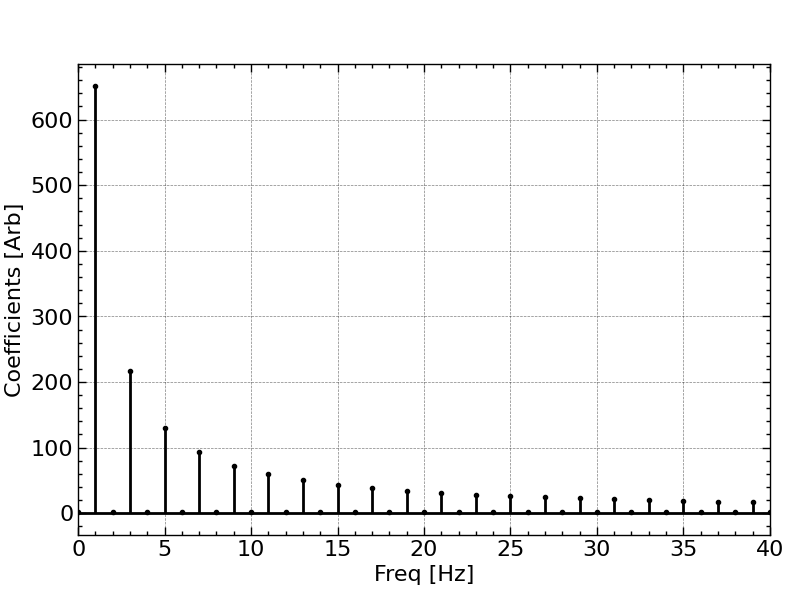

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()
plt.gcf()
plt.gca()

# plt.figure(figsize=(6, 4))
ax1 = plt.subplot(1, 1, 1)

n = 2 ** 10
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
omega = 2 * np.pi * 0.5
sig = -np.sign(np.cos(omega * t))

f = np.fft.rfftfreq(len(t), dt)
ax1.stem(f, np.abs(np.fft.rfft(sig)), linefmt = 'k', markerfmt = 'k', basefmt = 'k')
# fft_x = np.fft.rfft(signal)

# ax1.plot(time, signal, 'k-')

# for order in [10, 30, 100]:
    # reconstructed_x = np.fft.irfft(fft_signal * (np.arange(fft_signal.size) < order))
    # ax1.plot(time, reconstructed_signal, label = f"N = {order}", linewidth = 1.5)

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.15), loc = 'upper center', ncol = 4)

ax1.set_xlabel('Freq [Hz]')
ax1.set_ylabel('Coefficients [Arb]')
# ax1.set_yscale('log')
# ax1.set_xscale('log')

# ax1.autoscale(axis = 'x', tight=True)
ax1.set_xlim(0, 40)

plt.tight_layout()

# plt.savefig(save_path + 'figure_ringing' + '.png',bbox_inches='tight',dpi=300)

plt.show()

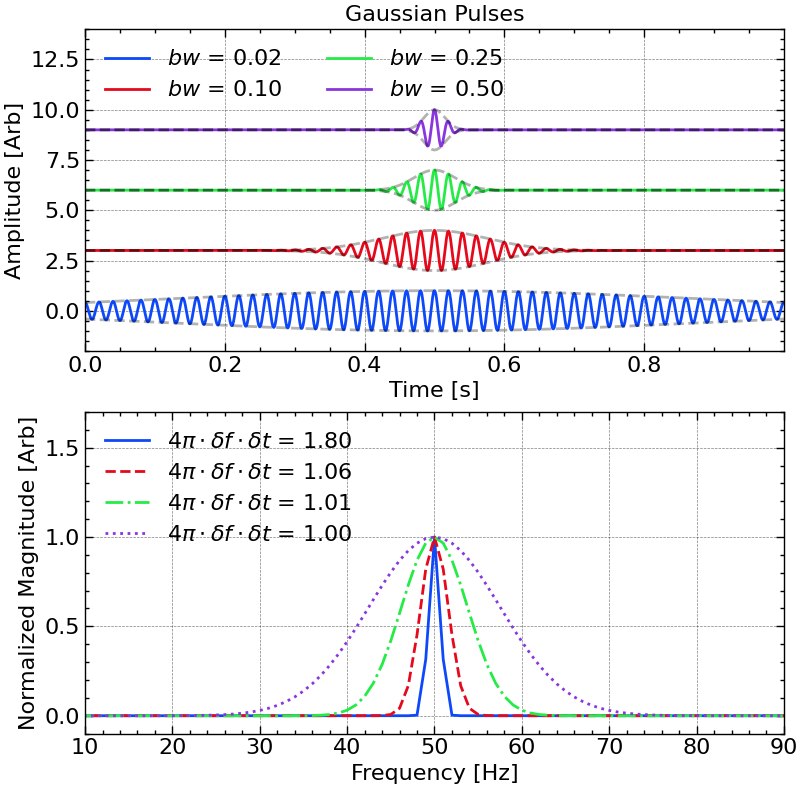

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()
plt.gcf()
plt.gca()

n = 2 ** 14
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
omega = 50.0 * 2 * np.pi
bws = np.array([0.02, 0.1, 0.25, 0.5])

plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

for idx, bw in enumerate(bws):
    # sig = np.exp(-((t - np.mean(t))**2) / (2 * sigma**2)) * np.cos(omega * t)  # 50 Hz 的正弦波调制的高斯脉冲
    sig, sig_env = scipy.signal.gausspulse(t - np.mean(t), fc = omega / 2 / np.pi, bw = bw, retenv = True)
    ax1.plot(t, 3.0 * idx + sig, label = r"$bw$ = %.2f" % bw, linestyle = '-')
    ax1.plot(t, 3.0 * idx + sig_env, 'k--', alpha = 0.3)
    ax1.plot(t, 3.0 * idx - sig_env, 'k--', alpha = 0.3)
    # ax1.plot(t, 3.0 * idx + np.exp(-((t - np.mean(t))**2) / (2 * sigma**2)), 'k--', alpha = 0.3)
    # ax1.plot(t, 3.0 * idx - np.exp(-((t - np.mean(t))**2) / (2 * sigma**2)), 'k--', alpha = 0.3)

    sig -= np.mean(sig)  # 去除直流分量
    # ----- 频域谱 -----
    f, psd = scipy.signal.welch(sig, fs, nperseg = n)  # 使用Welch方法计算功率谱密度

    t0 = np.sum(t * np.abs(sig)**2) / np.sum(sig ** 2)        # 中心时刻
    delta_t = np.sqrt(np.sum(((t - t0)**2) * sig**2) / np.sum(sig**2))
    
    f0 = np.sum(f * psd) / np.sum(psd)
    delta_f = np.sqrt(np.sum(((f - f0)**2) * psd) / np.sum(psd))

    ax2.plot(f, psd / np.max(psd), label = r"$4\pi \cdot \delta f \cdot \delta t$ = %.2f" % (4 * np.pi * delta_t * delta_f))

# ---------------- 轴标签与图例 ----------------
# ax1.set_title("Gaussian Pulses (Time Domain)")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Amplitude [Arb]")

# ax2.set_title("Magnitude Spectra (Frequency Domain)")
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Normalized Magnitude [Arb]")

ax1.set_ylim(-2, 14)

ax1.legend(frameon = False, ncols = 2, loc = 'upper left')
ax2.legend(frameon = False, ncols = 1, loc = 'upper left')

ax1.autoscale(axis = 'x', tight=True)
ax2.set_xlim(10, 90)
ax2.set_ylim(-0.1, 1.7)
ax1.set_title('Gaussian Pulses')

plt.tight_layout()

plt.savefig(save_path + 'figure_uncertainty_principle' + '.png',bbox_inches='tight',dpi=300)
plt.show()

9.210711661013256


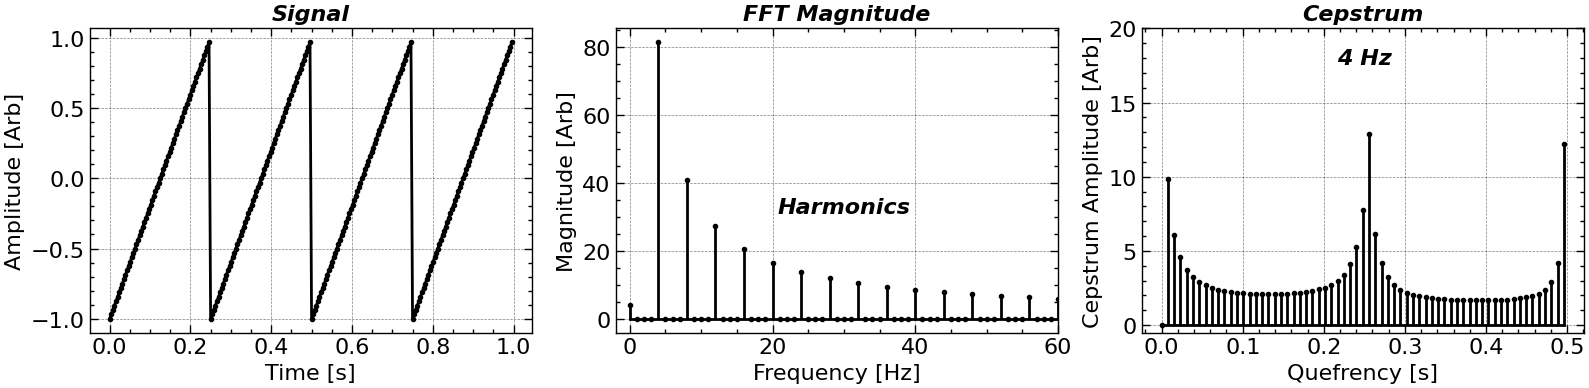

In [ ]:
plt.close()
plt.figure(figsize=(16, 4))

n = 2 ** 8
omega0 = 2 * np.pi * 4.0
t = np.linspace(0, 1, n, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt

sig = 2 * ((omega0 / 2 / np.pi * t) % 1.0 - 0.5)
sig += np.random.randn(t.size) * 0e-1 # Add some noise
f = np.fft.rfftfreq(n, dt)
X = np.fft.rfft(sig)

CEPSTRUM_MAGNITUDE_THRESHOLD = np.sqrt(np.mean(np.abs(X) ** 2))
print(CEPSTRUM_MAGNITUDE_THRESHOLD)

log_abs_X = np.log(np.abs(CEPSTRUM_MAGNITUDE_THRESHOLD + X))
log_abs_X -= np.mean(log_abs_X)  # Remove DC component for cepstrum calculation
cepstrum = np.fft.rfft(log_abs_X)
df = f[1] - f[0]
quefrency = np.fft.rfftfreq(log_abs_X.size, df)


ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.plot(t, sig, 'ko-', label='Signal')
ax2.stem(f, np.abs(X), linefmt='k', markerfmt='k', basefmt='k')

ax3.stem(quefrency, np.abs(cepstrum), linefmt='k', markerfmt='k', basefmt='k')
# ax3.vlines(1 / (omega0 / (2 * np.pi)), 0, 41, color='C1', linestyle='-', label='Fundamental Frequency')

# ax2.annotate('', arrowprops=dict(arrowstyle="-|>, head_width = 0.4, head_length = 0.8", color='k', lw=2.5),
#             xy=(58, 35), xytext=(50, 35),
#             ha='center', va='bottom',
#             color='k', weight='bold',
#             bbox=dict(boxstyle="round,pad=0.3", edgecolor='k', facecolor='w'))
# ax2.annotate('', arrowprops=dict(arrowstyle="-|>, head_width = 0.4, head_length = 0.8", color='k', lw=2.5),
#             xy=(58, 45), xytext=(50, 45),
#             ha='center', va='bottom',
#             color='k', weight='bold',
#             bbox=dict(boxstyle="round,pad=0.3", edgecolor='k', facecolor='w'))

ax2.text(30, 30, 'Harmonics', color = 'k', ha = 'center', va = 'bottom', **title_font)
ax3.text(1 / (omega0 / (2 * np.pi)), 18, '4 Hz', color = 'k', ha = 'center', va = 'center', **title_font)
ax3.set_ylim(-0.5, 20)

ax1.set_title('Signal', **title_font)
ax2.set_title('FFT Magnitude', **title_font)
ax3.set_title('Cepstrum', **title_font)

ax1.set_xlabel('Time [s]')
ax2.set_xlabel('Frequency [Hz]')
ax3.set_xlabel('Quefrency [s]')
ax1.set_ylabel('Amplitude [Arb]')
ax2.set_ylabel('Magnitude [Arb]')
ax3.set_ylabel('Cepstrum Amplitude [Arb]')

ax2.set_xlim(-2, 60)

plt.tight_layout()

plt.savefig(save_path + 'figure_cepstrum' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:

# widths = bandwidth * scales / (2 * np.pi)
# coef = scipy.signal.cwt(
#     signal,
#     scipy.signal.morlet2,
#     widths = widths,
#     w = bandwidth,
#     dtype = np.complex128
# )
# frequency = 1 / dt / scales

# === Option 2: pywt implementation ===
# Unlike scipy.signal.cwt, pywt.cwt is not L2-normalized.
# You need to multiply the coefficients by a factor to make them L2-normalized.
# Another two problems with pywt.cwt: The precision of the wavelet may be unenough while you can still not adjust the precision yourself.
# Check https://github.com/PyWavelets/pywt/issues/531
# This defect has been proposed at 2019 but still not fixed yet.

# central_frequency = 1.0
# wavelet = 'cmor%.1f-%.1f' % (bandwidth, central_frequency)
# coef, frequency = pywt.cwt(signal, scales, wavelet, dt, method = 'fft')
# coef *= np.sqrt(np.sqrt(bandwidth) * np.sqrt(2 * np.pi))  # amplitude normalization for Morlet

# === Option 3: ssqueezepy implementation (default used here) ===
# This one is accurate and fast. They claim that this package is the fastest implementation of the wavelet transform in Python.
# bandwidthut, this implementation is not elegantly designed and the input parameters are not well documented.
# Also, it requires package numba, which may raise some compatibility issues.
# coef, scales = ssqueezepy.cwt(signal, ('morlet', {'mu': bandwidth}), scales = bandwidth / (2 * np.pi) * scales.astype(np.float32), fs = 1 / dt, l1_norm = False)
# frequency = bandwidth / (2 * np.pi) / dt / scales

plt.close()
plt.figure(figsize=(8, 6))
plt.subplots_adjust(hspace = 0.02, right = 0.82, left = 0.18)

ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
ax3 = plt.subplot(3, 1, 3, sharex=ax1)

n = 2 ** 15
t = np.linspace(0, 1, n)
dt = t[1] - t[0]
fs = 1 / dt

omega = 250

# Generate a signal with 4 components: 
# 1. Sinuoidal; 2. Growing Sinuoidal; 3. Chirping Sinuoidal; 4. White noise

sig = 3 * np.sin(5 * omega * t) + 16 * t  * np.sin(2 * omega * t) + 6 * np.sin(2 * omega * (2 * t + 1) * t)
noise_level = 1.0
sig += np.random.randn(n) * noise_level

ax1.plot(t, sig, 'k-', label = 'Signal')
ax1.autoscale(axis='x', tight=True)

step = 100
window = 2048
window_in_seconds = window * dt  # window length in seconds
mfft = window * 5

hann_window = scipy.signal.windows.hann(window, sym = True)  # symmetric Gaussian window
STFT = scipy.signal.ShortTimeFFT(hann_window, hop=step, fs = fs, scale_to='psd', fft_mode = 'onesided2X', mfft = mfft)  # create the STFT object
stft_psd = STFT.stft(sig)  # perform the STFT
stft_time = np.arange(0, stft_psd.shape[1]) * STFT.hop / fs - STFT.win.size / 2 / fs  # time vector for STFT
stft_frequency = np.fft.rfftfreq(mfft, d=dt)  # frequency vector for STFT
stft_psd = np.abs(stft_psd) ** 2
# stft_psd[0, :] *= 0.0

pc2 = ax2.pcolormesh(stft_time, stft_frequency, np.log10(stft_psd), cmap='viridis', vmax=.5, vmin=-2.0)

for ax in [ax2, ax3]:
    ax.axvspan(stft_time[0], STFT.lower_border_end[0] * STFT.T, color='C1', linewidth=0, alpha=.2)
    ax.axvspan(STFT.upper_border_begin(sig.size)[0] * STFT.T, stft_time[-1], color='C1', linewidth=0, alpha=.2)


ax2.set_yscale('log')

df = np.diff(stft_frequency)[0]
integrated_stft_psd = np.nansum((stft_psd.T * df), axis=1)
ax3.plot(stft_time, integrated_stft_psd, 'C1', label='STFT')

# Theoretical PSD defined as half of the sum of the square of amplitudes of the components
ax3.plot(t, np.ones_like(t) * (3 ** 2 + (16 * t) ** 2 + 6 ** 2 + 2 * noise_level ** 2) / 2, 'k--', label=r'$\frac{1}{2}{\mathrm{Amp_{w}^2} + \sigma_{noise}^2}$')

ax3.legend(frameon=False, ncols = 1, loc = 'upper center')

ax2.autoscale(axis='y', tight=True)
ax1.autoscale(axis='x', tight=True)
# ax1.set_xlim(0, 1)

ax2.set_ylim(18, 600)
ax3.set_ylim(-5, 240)
ax3.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude\n[Arb]')
ax2.set_ylabel('Frequency\n[Hz]')
ax3.set_ylabel('Integrated\nPower\n[$\mathrm{Arb}^2$]')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

fig = plt.gcf()
cbar_ax2 = fig.add_axes(
    [ax2.get_position().x1 + 0.01, ax2.get_position().y0, 0.02, ax2.get_position().y1 - ax2.get_position().y0])
cbar2 = plt.colorbar(pc2, cax=cbar_ax2)
cbar2.ax.xaxis.set_label_position('top')
cbar2.ax.xaxis.set_ticks_position('top')
cbar2.ax.tick_params(which='major', length=4, direction='in', pad=3)
cbar2.ax.set_ylabel('$\mathrm{log_{10}(PSD)}$\n$\mathrm{[Arb^2 \cdot Hz^{-1}]}$')

ax1.set_title('Short-Time Fourier Transform Spectrum', **title_font)

# plt.savefig(save_path + 'figure_stft' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
plt.close()
plt.figure(figsize=(8, 6))
plt.subplots_adjust(hspace = 0.02, right = 0.82, left = 0.18)

ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
ax3 = plt.subplot(3, 1, 3, sharex=ax1)

n = 2 ** 15
t = np.linspace(0, 1, n)
dt = t[1] - t[0]
fs = 1 / dt

omega = 250

# Generate a signal with 4 components: 
# 1. Sinuoidal; 2. Growing Sinuoidal; 3. Chirping Sinuoidal; 4. White noise

sig = 3 * np.sin(5 * omega * t) + 16 * t  * np.sin(2 * omega * t) + 6 * np.sin(2 * omega * (2 * t + 1) * t)
noise_level = 1.0
sig += np.random.randn(n) * noise_level

ax1.plot(t, sig, 'k-', label = 'Signal')
ax1.autoscale(axis='x', tight=True)

step = 100
window = 2048
window_in_seconds = window * dt  # window length in seconds
mfft = window * 5

hann_window = scipy.signal.windows.hann(window, sym = True)  # symmetric Gaussian window
STFT = scipy.signal.ShortTimeFFT(hann_window, hop=step, fs = fs, scale_to='psd', fft_mode = 'onesided2X', mfft = mfft)  # create the STFT object
stft_psd = STFT.stft(sig)  # perform the STFT
stft_time = np.arange(0, stft_psd.shape[1]) * STFT.hop / fs - STFT.win.size / 2 / fs  # time vector for STFT
stft_frequency = np.fft.rfftfreq(mfft, d=dt)  # frequency vector for STFT
stft_psd = np.abs(stft_psd) ** 2
# stft_psd[0, :] *= 0.0

pc2 = ax2.pcolormesh(stft_time, stft_frequency, np.log10(stft_psd), cmap='viridis', vmax=1, vmin=-4.0)

for ax in [ax2, ax3]:
    ax.axvspan(stft_time[0], STFT.lower_border_end[0] * STFT.T, color='C1', linewidth=0, alpha=.2, hatch = 'x')
    ax.axvspan(STFT.upper_border_begin(sig.size)[0] * STFT.T, stft_time[-1], color='C1', linewidth=0, alpha=.2, hatch = 'x')


ax2.set_yscale('log')

df = np.diff(stft_frequency)[0]
integrated_stft_psd = np.nansum((stft_psd.T * df), axis=1)
ax3.plot(stft_time, integrated_stft_psd, 'C1', label='STFT')

# Theoretical PSD defined as half of the sum of the square of amplitudes of the components
ax3.plot(t, np.ones_like(t) * (3 ** 2 + (16 * t) ** 2 + 6 ** 2 + 2 * noise_level ** 2) / 2, 'k--', label=r'$\sum({\mathrm{{Amp_{w}^2}}/2) + \mathrm{\sigma_{noise}^2}}$')

ax3.legend(frameon=False, ncols = 1, loc = 'upper center')

ax2.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs = (1,)))
ax2.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='all'))

ax2.tick_params(axis = 'both', which = 'both', color = 'w')

# ax2.autoscale(axis='y', tight=True)
# ax1.autoscale(axis='x', tight=True)
ax1.set_xlim(0, 1)

ax2.set_ylim(18, 600)
ax3.set_ylim(-5, 240)

ax3.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude\n[Arb]')
ax2.set_ylabel('Frequency\n[Hz]')
ax3.set_ylabel('Integrated\nPower\n[$\mathrm{Arb}^2$]')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

fig = plt.gcf()
cbar_ax2 = fig.add_axes(
    [ax2.get_position().x1 + 0.01, ax2.get_position().y0, 0.02, ax2.get_position().y1 - ax2.get_position().y0])
cbar2 = plt.colorbar(pc2, cax=cbar_ax2)
cbar2.ax.xaxis.set_label_position('top')
cbar2.ax.xaxis.set_ticks_position('top')
cbar2.ax.tick_params(which='major', length=4, direction='in', pad=3)
cbar2.ax.set_ylabel('$\mathrm{log_{10}(PSD)}$\n$\mathrm{[Arb^2 \cdot Hz^{-1}]}$')

ax1.set_title('Short-Time Fourier Transform Spectrum', **title_font)

plt.savefig(save_path + 'figure_stft' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import pywt
import ssqueezepy

plt.close()
plt.figure(figsize=(8, 6))
plt.subplots_adjust(hspace = 0.02, right = 0.82, left = 0.18)

ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2, sharex=ax1, sharey = ax1)
ax3 = plt.subplot(3, 1, 3, sharex=ax1)

n = 2 ** 15
t = np.linspace(0, 1, n)
dt = t[1] - t[0]
fs = 1 / dt

omega = 250
sig = 3 * np.sin(5 * omega * t) + 16 * t  * np.sin(2 * omega * t) + 6 * np.sin(2 * omega * (2 * t + 1) * t)
noise_level = 1.0
sig += np.random.randn(n) * noise_level

scales = 2 ** np.linspace(4, 12, 160, endpoint = False)

bandwidth = 12.0
central_frequency = 1.0

wavelet = 'cmor%.1f-%.1f' % (bandwidth, central_frequency)
coef, f = pywt.cwt(sig, scales, wavelet, dt, method = 'fft')
coef *= np.sqrt(np.sqrt(bandwidth) * np.sqrt(2 * np.pi))  # amplitude normalization for Morlet
psd = (np.abs(coef) ** 2) * (2 * dt)
df = (f[0] / f[1] - 1) * f / np.sqrt(f[0] / f[1])

pc1 = ax1.pcolormesh(t, f, np.log10(psd), cmap = 'viridis', vmax=1, vmin=-5.0)
ax3.plot(t, np.nansum(psd.T * df, axis = -1), 'C0', label = 'pywt')

coef, scales = ssqueezepy.cwt(sig, ('morlet', {'mu': bandwidth}), scales = bandwidth / (2 * np.pi) * scales.astype(np.float32), fs = 1 / dt, l1_norm = False)
f = bandwidth / (2 * np.pi) / dt / scales
df = (f[0] / f[1] - 1) * f / np.sqrt(f[0] / f[1])
psd = (np.abs(coef) ** 2) * (2 * dt)

pc2 = ax2.pcolormesh(t, f, np.log10(psd), cmap = 'viridis', vmax=1, vmin=-5.0)
ax3.plot(t, np.nansum(psd.T * df, axis = -1), label = 'ssqueezepy')

coi = (np.sqrt(4) * bandwidth / (2 * np.pi) / f).astype(float)

ax1.fill_betweenx(f, x1 = t[0], x2 = t[0] + coi, alpha = 0.2, color = 'C1', hatch = 'x', edgecolor = 'none')
ax1.fill_betweenx(f, x1 = t[-1], x2 = t[-1] - coi, alpha = 0.2, color = 'C1', hatch = 'x', edgecolor = 'none')

ax2.fill_betweenx(f, x1 = t[0], x2 = t[0] + coi, alpha = 0.2, color = 'C1', hatch = 'x', edgecolor = 'none')
ax2.fill_betweenx(f, x1 = t[-1], x2 = t[-1] - coi, alpha = 0.2, color = 'C1', hatch = 'x', edgecolor = 'none')

ax2.set_yscale('log')

# df = np.diff(stft_frequency)[0]
# integrated_stft_psd = np.nansum((stft_psd.T * df), axis=1)
# ax3.plot(stft_time, integrated_stft_psd, 'C1', label='STFT')

# Theoretical PSD defined as half of the sum of the square of amplitudes of the components
ax3.plot(t, np.ones_like(t) * (3 ** 2 + (16 * t) ** 2 + 6 ** 2 + 2 * noise_level ** 2) / 2, 'k--', label=r'$\frac{1}{2}{\mathrm{Amp_{w}^2} + \sigma_{noise}^2}$')


# ax2.autoscale(axis='y', tight=True)
# ax1.autoscale(axis='x', tight=True)
# ax1.set_xlim(0, 1)

ax1.set_ylim(51, 1100)
ax3.set_ylim(-5, 240)
ax3.set_xlabel('Time [s]')
ax1.set_ylabel('Frequency\n[Hz]')
ax2.set_ylabel('Frequency\n[Hz]')
ax3.set_ylabel('Integrated\nPower\n[$\mathrm{Arb}^2$]')

ax1.text(0.02, 800, 'pywt', color = 'C0', fontsize = 14, path_effects = path_effect, weight = 'bold', fontstyle = 'italic')
ax2.text(0.02, 800, 'ssqueezepy', color = 'C1', fontsize = 14, path_effects = path_effect, weight = 'bold', fontstyle = 'italic')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

fig = plt.gcf()
cbar_ax2 = fig.add_axes(
    [ax2.get_position().x1 + 0.01, ax2.get_position().y0, 0.02, ax1.get_position().y1 - ax2.get_position().y0])
cbar2 = plt.colorbar(pc2, cax=cbar_ax2)
cbar2.ax.xaxis.set_label_position('top')
cbar2.ax.xaxis.set_ticks_position('top')
cbar2.ax.tick_params(which='major', length=4, direction='in', pad=3)
cbar2.ax.set_ylabel('$\mathrm{log_{10}(PSD)}$\n$\mathrm{[Arb^2 \cdot Hz^{-1}]}$')

ax1.set_title('Wavelet Transform Spectrum', **title_font)
ax3.legend(frameon=False, ncols = 1, loc = 'upper left')

plt.savefig(save_path + 'figure_wavelet' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
plt.close()
ax1 = plt.subplot(1, 1, 1)
n = 2 ** 8
t = np.linspace(0, 1, n, endpoint = False)
dt = t[1] - t[0]
omega0 = 5 * 2 * np.pi
sig = 20.5 * (1 + 0.1 * np.cos(omega0 * t))
sig = np.random.poisson(sig).astype(float)
sig -= np.mean(sig)

# ax1.plot(t, x)
# ax1.set_ylim(-.1, 1.1)

f = np.fft.rfftfreq(n, d = dt)
coef = np.fft.rfft(sig)
ax1.stem(f, np.abs(coef))
ax1.vlines(omega0 / 2 / np.pi, 0, -100, color = 'C1')

plt.show()

In [ ]:
def gaussian(x, x0, sigma):
    return np.exp(-np.power((x - x0) / sigma, 2.0) / 2.0)


def make_chirp(t, t0, a):
    frequency = (a * (t + t0)) ** 2
    chirp = np.sin(2 * np.pi * frequency * t)
    return chirp, frequency


def plot_wavelet(time, data, wavelet, title, ax):
    widths = np.geomspace(1, 1024, num=75)
    cwtmatr, freqs = pywt.cwt(
        data, widths, wavelet, sampling_period=np.diff(time).mean()
    )
    cwtmatr = np.abs(cwtmatr[:-1, :-1])
    pcm = ax.pcolormesh(time, freqs, cwtmatr)
    ax.set_yscale("log")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(title)
    plt.colorbar(pcm, ax=ax)
    return ax


# generate signal
t = np.linspace(0, 1, 1000)
chirp1, frequency1 = make_chirp(t, 0.2, 9)
chirp2, frequency2 = make_chirp(t, 0.1, 5)
chirp = chirp1 + 0.6 * chirp2
chirp *= gaussian(t, 0.5, 0.2)

# perform CWT with different wavelets on same signal and plot results
wavelets = [f"cmor{x:.1f}-{y:.1f}" for x in [0.5, 1.5, 2.5] for y in [0.5, 1.0, 1.5]]
fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharex=True)
for ax, wavelet in zip(axs.flatten(), wavelets):
    plot_wavelet(t, chirp, wavelet, wavelet, ax)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Scaleograms of the same signal with different wavelets")
plt.show()

In [43]:
import ssqueezepy
"""
Rule of thumb for the shape of numpy.ndarray: Frequency Dimension (Nf) -> Time Dimension (Nt) -> Component Dimension (3, or 3 x 3 / 6 x 3 for spectral maxtrix)
"""

def wavelet_coef_psd(time: np.ndarray, signal: np.ndarray, scales: np.ndarray, bandwidth: float = 6.0, downsample: int = 1, downsample_signal: bool = True):
    """
    Compute complex Morlet wavelet coefficients and power spectral density (PSD).
    Complex Morlet wavelet can be written as:

    Parameters:
    ----------
    time : np.ndarray
        Time vector of shape (Nt,). Can be in seconds or `np.datetime64`.
    signal : np.ndarray
        Input signal of shape (Nt,).
    scales : np.ndarray
        Wavelet scales corresponding to frequencies of shape (Nf,).
    bandwidth : float, optional
        bandwidthandwidth parameter for the Morlet wavelet (default is 6.0).
    downsample : int, optional
        Downsampling factor for the output (default is 1, meaning no downsampling).
    downsample_signal : bool, optional
        If True, downsample the input signal before computing wavelet coefficients (default is False).
        If False, the signal is not downsampled, but the output coefficients and PSD are downsampled.

    Returns:
    -------
    time : np.ndarray
        Time vector after optional downsampling.
    frequency : np.ndarray
        Frequencies corresponding to the wavelet scales.
    coef : np.ndarray
        Complex wavelet coefficients of shape (Nf, Nt), where Nf is the number of frequencies.
    psd : np.ndarray
        Power spectral density of shape (Nf, Nt).
    signal : np.ndarray
        Downsampled (moving average) signal if downsampling is applied.

    Notes:
    -----
    - The function uses `scipy.signal.cwt` with the Morlet wavelet by default.
    - `scipy.signal.cwt` is deprecated in SciPy 1.12 and will be removed in SciPy 1.15. Alternatives like PyWavelets or ssqueezepy can be used.
    - The power spectral density (PSD) is computed as the squared magnitude of the wavelet coefficients, scaled by `2 * dt`.
    - Downsampling is applied to the time, coefficients, PSD, and signal if `downsample > 1`.
    """

    if downsample_signal:
        time = time[::downsample]
        signal = signal[::downsample]
        downsample = 1

    if isinstance(time[0], np.datetime64):
        elapsed_time = np.array(time).astype('datetime64[ns]').astype('float') / 1e9
    else:
        elapsed_time = np.array(time)

    dt = elapsed_time[1] - elapsed_time[0]

    # === Option 1: scipy.signal implementation ===
    # bandwidthut, scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed in SciPy 1.15. 
    # They recommend using PyWavelets instead.
    # https://docs.scipy.org/doc/scipy-1.12.0/reference/generated/scipy.signal.cwt.html
    # However, as you can see in the bottom code block, pywt.cwt is actually problematic for the Morlet wavelet.

    # widths = bandwidth * scales / (2 * np.pi)
    # coef = scipy.signal.cwt(
    #     signal,
    #     scipy.signal.morlet2,
    #     widths = widths,
    #     w = bandwidth,
    #     dtype = np.complex128
    # )
    # frequency = 1 / dt / scales

    # === Option 2: pywt implementation ===
    # Unlike scipy.signal.cwt, pywt.cwt is not L2-normalized.
    # You need to multiply the coefficients by a factor to make them L2-normalized.
    # Another two problems with pywt.cwt: The precision of the wavelet may be unenough while you can still not adjust the precision yourself.
    # Check https://github.com/PyWavelets/pywt/issues/531
    # This defect has been proposed at 2019 but still not fixed yet.

    # central_frequency = 1.0
    # wavelet = 'cmor%.1f-%.1f' % (bandwidth, central_frequency)
    # coef, frequency = pywt.cwt(signal, scales, wavelet, dt, method = 'fft')
    # coef *= np.sqrt(np.sqrt(bandwidth) * np.sqrt(2 * np.pi))  # amplitude normalization for Morlet

    # === Option 3: ssqueezepy implementation (default used here) ===
    # This one is accurate and fast. They claim that this package is the fastest implementation of the wavelet transform in Python.
    # bandwidthut, this implementation is not elegantly designed and the input parameters are not well documented.
    # Also, it requires package numba, which may raise some compatibility issues.
    coef, scales = ssqueezepy.cwt(signal, ('morlet', {'mu': bandwidth}), scales = bandwidth / (2 * np.pi) * scales.astype(np.float32), fs = 1 / dt, l1_norm = False)
    frequency = bandwidth / (2 * np.pi) / dt / scales

    # coef, _, frequency, _ = ssqueezepy.ssq_cwt(signal, ('morlet', {'mu': bandwidth}), scales = bandwidth / (2 * np.pi) * scales.astype(np.float32), fs = 1 / dt)
    # coef = (coef.T * bandwidth * np.sqrt(scales / np.pi)).T

    psd = (np.abs(coef) ** 2) * (2 * dt)
    
    return time[::downsample], frequency, coef[:, ::downsample], psd[:, ::downsample], signal[::downsample]

def wfft_coef_psd(time: np.ndarray, signal: np.ndarray, step: int = 1, window: int = 120):
    """
    Compute short-time Fourier transform (STFT) coefficients and power spectral density (PSD) using a sliding Hanning window.

    Parameters:
    ----------
    time : np.ndarray
        Time vector of shape (Nt,). Can be in seconds or `np.datetime64`.
    signal : np.ndarray
        Input signal of shape (Nt,).
    step : int, optional
        Step size for sliding the window (default is 1).
    window : int, optional
        Window length in samples (default is 120).

    Returns:
    -------
    wtime : np.ndarray
        Center time for each window after sliding.
    freq : np.ndarray
        Frequency vector corresponding to the FFT.
    coef : np.ndarray
        Complex FFT coefficients of shape (Nf, Nt), where Nf is the number of frequencies.
    psd : np.ndarray
        Power spectral density of shape (Nf, Nt).
    wsignal : np.ndarray
        Window-averaged signal of shape (Nt,).

    Notes:
    -----
    - The Hanning window is applied to each segment, and normalization is performed based on Parseval's theorem.
    - The PSD is computed as the squared magnitude of the FFT coefficients, scaled by `2 * dt / window`.
    """

    if isinstance(time[0], np.datetime64):
        elapsed_time = np.array(time).astype('datetime64[ns]').astype('float') / 1e9
    else:
        elapsed_time = np.array(time)

    dt = elapsed_time[1] - elapsed_time[0]
    print(1 / dt)
    # Apply sliding window view
    wtime = np.lib.stride_tricks.sliding_window_view(elapsed_time, window)[::step][:, 0] + dt * window / 2
    freq = np.fft.fftfreq(window, dt)[:window // 2]
    freq = np.fft.rfftfreq(window, dt)
    freq = np.abs(freq)
    wsignal = np.lib.stride_tricks.sliding_window_view(signal, window)[::step]
    wsignal = wsignal - np.nanmean(wsignal, axis=-1, keepdims=True)  # Remove mean to avoid DC component
    # Apply Hanning window and normalize based on Parseval's theorem
    wsignal = wsignal * np.sqrt(8 / 3) * np.hanning(window)

    coef = np.fft.fft(wsignal, axis=-1)[:, :window // 2].T
    coef = np.fft.rfft(wsignal, axis=-1).T


    psd = (np.abs(coef) ** 2) * dt / window
    
    # Double the PSD values except for the DC component and Nyquist frequency
    if window % 2 == 0:
        psd[1:-1] *= 2

    else:
        psd[1:] *= 2

    if isinstance(time[0], np.datetime64):
        wtime = (np.array(wtime) * 1e9).astype('datetime64[ns]')

    wsignal = np.mean(wsignal, axis=-1)

    return wtime, freq, coef, psd, wsignal


def svd_wave_analysis(coef: np.ndarray, freq_window: int = 5, time_window: int = 5):
    """
    Perform SVD-based wave polarization analysis to compute planarity, ellipticity, and coherence.

    Parameters:
    ----------
    coef : np.ndarray
        Complex coefficient tensor of shape (Nf, Nt, 3), where Nf is the number of frequencies, Nt is the number of time points, and 3 represents the 3 components.
    freq_window : int, optional
        Frequency-domain smoothing window size (default is 5).
    time_window : int, optional
        Time-domain smoothing window size (default is 5).

    Returns:
    -------
    planarity : np.ndarray
        Planarity of the wave of shape (Nf, Nt), defined as `1 - sqrt(s3 / s1)`, where s1 and s3 are the largest and smallest singular values.
    ellipticity_along_k: np.ndarray
        Ellipticity along the wave vector direction of shape (Nf, Nt), defined as the ratio of the second to the first singular value.
    coherence : np.ndarray
        Coherence between the first and second principal components (along vh1 and vh2) of shape (Nf, Nt), computed from the smoothed wavefield spectrum.
    degree_of_polarization : np.ndarray
        3D Degree of polarization of shape (Nf, Nt), defined as `sqrt[3 / 2 * tr(J^2) / tr^2(J) - 1 / 2]`, computed using the wavefield spectrum.
    vh : np.ndarray
        Right singular vectors of shape (Nf, Nt, 3, 3), representing the polarization basis.

    Notes:
    -----
    - The input coefficients are smoothed in both frequency and time domains before performing SVD.
    - The coherence is computed from the wavefield spectrum in the transformed basis.
    """

    spec = np.einsum('fti,ftj->ftij', coef, coef.conj())
    spec = bn.move_mean(spec, window=freq_window, min_count=1, axis=0)
    spec = bn.move_mean(spec, window=time_window, min_count=1, axis=1)

    spec_63 = np.concatenate([spec.real, spec.imag], axis=-2)
    u, s, vh = np.linalg.svd(spec_63, full_matrices=False)

    planarity = 1 - np.sqrt(s[:, :, 2] / s[:, :, 0])
    ellipticity_along_k = s[:, :, 1] / s[:, :, 0]

    # ellipticity_along_k = (s[:, :, 1] - s[:, :, 2]) / (s[:, :, 0] - s[:, :, 2])

    # Rotate the coefficients to the wave frame, in which the third component is the least significant
    coef_wf = np.einsum('ijk,ijlk->ijl', coef, vh)
    spec_wf = np.einsum('ijk,ijl->ijkl', coef_wf, coef_wf.conj())
    spec_wf = bn.move_mean(spec_wf, window=freq_window, min_count=1, axis=0)
    spec_wf = bn.move_mean(spec_wf, window=time_window, min_count=1, axis=1)

    # There are two ways to compute the degree of polarization:
    # To see the difference in theory, please refer to the paper by Taubenschuss and Santonlik (2019).
    # Equation (28) in Taubenschuss and Santonlik 2019: 
    # degree_of_polarization = np.sqrt(3 / 2 * np.abs(np.trace(np.matmul(spec, spec), axis1 = 2, axis2 = 3) / (np.trace(spec, axis1 = 2, axis2 = 3) ** 2)) - 1 / 2)

    # Equation (74) in Taubenschuss and Santonlik 2019:
    # Be careful about np.linalg.eigh, which returns the eigenvalues in ascending order
    # While np.linalg.svd returns the singular values in descending order  
    w, v = np.linalg.eigh(spec)
    degree_of_polarization = (w[:, :, 2] - w[:, :, 1]) / np.sum(w, axis = -1)

    coherence = np.abs(spec_wf[:, :, 0, 1]) / np.sqrt(np.abs(spec_wf[:, :, 0, 0] * spec_wf[:, :, 1, 1]))

    # eigenvalues, _ = np.linalg.eig(spec_wf[:, :, :2, :2])
    # eigenvalues_r, _ = np.linalg.eig(spec_wf[:, :, :2, :2].real)
    # ellipticity_along_k = np.sqrt((np.min(eigenvalues_r[:, :, :].real, axis = -1) - np.min(eigenvalues[:, :, :].real, axis = -1)) \
    #                               / (np.max(eigenvalues_r[:, :, :].real, axis = -1) - np.min(eigenvalues[:, :, :].real, axis = -1)))

    eigenvalues_r, _ = np.linalg.eigh(spec_wf[:, :, :2, :2].real) # Ascending
    eigenvalues, _ = np.linalg.eigh(spec_wf[:, :, :2, :2]) # Ascending

    # ellipticity_along_k = np.sqrt((eigenvalues_r[:, :, 0] - eigenvalues[:, :, 0]) \
    #                               / (eigenvalues_r[:, :, 1] - eigenvalues[:, :, 0]))

    return planarity, ellipticity_along_k, coherence, degree_of_polarization, vh


def fac_wave_analysis(coef: np.ndarray, magf: np.ndarray):
    """
    Project wave coefficients into the field-aligned coordinate (FAC) system.

    Parameters:
    ----------
    coef : np.ndarray
        Wavelet or FFT coefficient tensor of shape (Nf, Nt, 3), where Nf is the number of frequencies, Nt is the number of time points, and 3 represents the 3 components.
    field : np.ndarray
        Reference magnetic field vector of shape (Nt, 3).

    Returns:
    -------
    compressibility : np.ndarray
        Ratio of parallel power to the total power, indicating the compressibility of the wave.
    ellipticity_along_b : np.ndarray
        Ellipticity along the magnetic field direction, defined as the ratio of left-hand to right-hand polarized power.

    Notes:
    -----
    - The FAC system is defined using the magnetic field vector as the parallel direction, and two perpendicular directions are computed using cross products.
    - The left-hand and right-hand polarized components are computed in the perpendicular plane.
    """
    dir_para = (magf.T / np.linalg.norm(magf, axis = 1)).T
    # Find the reference direction that is furthest from the magnetic field direction
    dir_ref = np.eye(3)[np.argmin(np.abs(dir_para), axis = 1)]

    dir_perp_1 = np.cross(dir_para, dir_ref)
    dir_perp_1 = (dir_perp_1.T / np.linalg.norm(dir_perp_1, axis = 1)).T

    dir_perp_2 = np.cross(dir_para, dir_perp_1)
    dir_perp_2 = (dir_perp_2.T / np.linalg.norm(dir_perp_2, axis = 1)).T

    coef_para = np.einsum('ijk,jk->ij', coef, dir_para)
    coef_perp1 = np.einsum('ijk,jk->ij', coef, dir_perp_1)
    coef_perp2 = np.einsum('ijk,jk->ij', coef, dir_perp_2)

    coef_lh = (coef_perp1 - 1j * coef_perp2) / np.sqrt(2)
    coef_rh = (coef_perp1 + 1j * coef_perp2) / np.sqrt(2)

    ellipticity_along_b = (np.abs(coef_rh) - np.abs(coef_lh)) / (np.abs(coef_rh) + np.abs(coef_lh))
    compressibility = np.abs(coef_para) ** 2 / (np.abs(coef_para) ** 2 + np.abs(coef_lh) ** 2 + np.abs(coef_rh) ** 2)

    return compressibility, ellipticity_along_b

/tmp/ipykernel_677/539896603.py:355: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_677/539896603.py:355: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


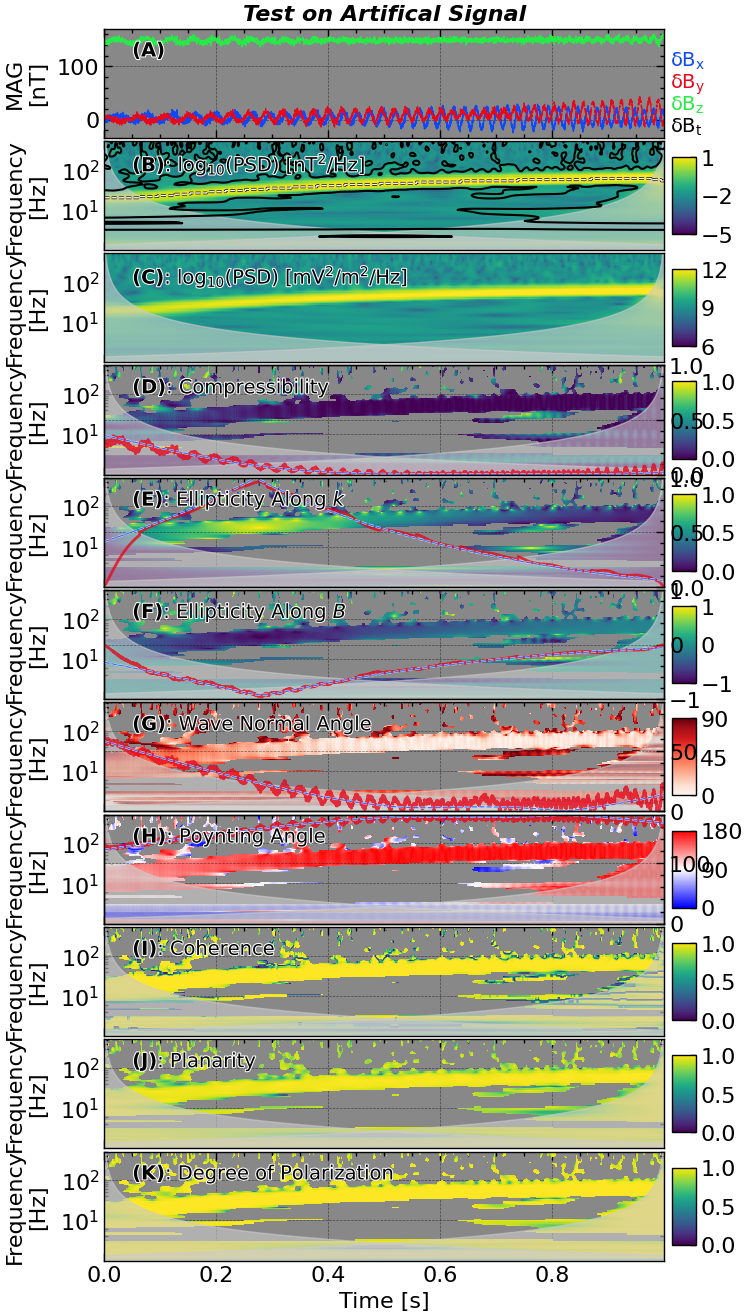

In [68]:
from scipy.signal import butter, filtfilt
import pywt
import ssqueezepy
import matplotlib.dates as mdate

# ==== 时间参数 ====
n = 2 ** 12
t = np.linspace(0, 1, n, endpoint = False)

dt = t[1] - t[0]
fs = 1 / dt
# ==== Background Magnetic Field ====
theta_b = 0.5 * np.pi * np.sin(2 * np.pi * 0.02 * t)
phi_b = 0.5 * np.pi * np.cos(2 * np.pi * 0.01 * t)
strength_b = 150 + 30 * np.sin(2 * np.pi * 0.3 * t)

theta_b = 0.5 * np.pi * np.sin(2 * np.pi * 0.01 * t)
phi_b = 0.5 * np.pi * np.cos(2 * np.pi * 0.01 * t)
strength_b = 150 + 30 * np.sin(2 * np.pi * 0.02 * t)

bx = strength_b * np.sin(theta_b) * np.cos(phi_b)
by = strength_b * np.sin(theta_b) * np.sin(phi_b)
bz = strength_b * np.cos(theta_b)
b0 = np.stack([bx, by, bz], axis=1)  # T

# ==== Wave Magnetic Field ====
omega = 100 + 300 * np.sin(2 * np.pi * 0.2 * t)
delta_phase = np.pi / 2 * (0.5 + 1.5 * np.sin(2 * np.pi * 0.2 * t))
amp = np.linspace(5, 20, n)

# ==== Direction of Propagation ====
theta1 = 0.3 * np.pi * (1 + np.cos(2 * np.pi * 0.4 * t + 1.5))
phi1 = 0.4 * np.pi * (2 + np.sin(2 * np.pi * 0.6 * t + 0.8))

dirb = b0 / np.linalg.norm(b0, axis = 1)[:, None]

dir1 = np.stack([
    np.sin(theta1) * np.cos(phi1),
    np.sin(theta1) * np.sin(phi1),
    np.cos(theta1)
], axis=1)

dir2 = np.cross(dir1, np.array([0, 0, 1]))  # 垂直于 dir1 的方向
dir3 = np.cross(dir1, dir2)  # 垂直于 dir1 和 dir2 的方向

dir2 /= np.linalg.norm(dir2, axis=1)[:, None]
dir3 /= np.linalg.norm(dir3, axis=1)[:, None]

phase = np.cumsum(omega * dt)

sig_b = amp[:, None] * (np.sin(phase)[:, None] * dir2 + np.sin(phase + delta_phase)[:, None] * dir3)  # nT
sig_b_dir = (np.sin(phase)[:, None] * dir2 + np.sin(phase + delta_phase)[:, None] * dir3)

sig_b = amp[:, None] * (np.exp(1j * phase)[:, None] * dir2 + np.exp(1j * (phase + delta_phase))[:, None] * dir3)
sig_b_dir = (np.sin(phase)[:, None] * dir2 + np.sin(phase + delta_phase)[:, None] * dir3)

v_phase = 300e3  # m/s
sig_e = v_phase * np.cross(dir1, sig_b)  # V/m


real_wna = np.arccos(np.abs(np.sum(dir1 * dirb, axis=1)))  # 波动方向与背景磁场的夹角
# real_compressibility = np.abs(np.sum(sig_b_dir * b0 / np.linalg.norm(sig_b_dir, axis = 1)[:, None] / np.linalg.norm(b0, axis = 1)[:, None], axis=1)) ** 2  # 压缩率
# real_compressibility = np.sum(dir2 * b0 / np.linalg.norm(b0, axis = 1)[:, None], axis=1) ** 2 + np.sum(dir3 * b0 / np.linalg.norm(b0, axis = 1)[:, None], axis=1) ** 2  # 压缩率

real_compressibility = ( np.sum(dir2 * dirb, axis=1) ** 2 + np.sum(dir3 * dirb, axis=1) ** 2  \
    + 2 * np.cos(delta_phase) * np.sum(dir2 * dirb, axis=1) * np.sum(dir3 * dirb, axis=1) ) / 2 # 压缩率

real_ellipticity_along_k = np.exp(-np.abs(np.log(np.abs(np.tan(delta_phase / 2))))) # 波动方向与背景磁场的夹角


dir2_perp = np.cross(dir3, dirb)  # 垂直于 dir1 的方向
dir3_perp = np.cross(dirb, dir2_perp)  # 垂直于 dir1 和 dir2 的方向

# dir2_perp = dir2 - np.sum(dir2 * dirb, axis=1)[:, None] * dirb  # 垂直于 dir2 的方向
# dir3_perp = dir3 - np.sum(dir3 * dirb, axis=1)[:, None] * dirb  # 垂直于 dir1 的方向

# ratio = np.linalg.norm(dir3_perp, axis=1) / np.linalg.norm(dir2_perp, axis=1)

dir2_perp /= np.linalg.norm(dir2_perp, axis=1)[:, None]
dir3_perp /= np.linalg.norm(dir3_perp, axis=1)[:, None]

epara2_to_epara3_ratio = np.linalg.norm(np.cross(dir2, dirb), axis = 1) / np.linalg.norm(np.cross(dir3, dirb), axis = 1)  # epara1 与 epara2 的比值

real_ellipticity_along_b = np.tan( 1 / 2 * np.arcsin(2 * epara2_to_epara3_ratio * np.sin(delta_phase) / (1 + epara2_to_epara3_ratio ** 2 ) ) )  # 波动方向与背景磁场的夹角

amp2_perp = np.sum(sig_b * dir2_perp, axis = 1)
amp3_perp = np.sum(sig_b * dir3_perp, axis = 1)

amp_ratio_b = np.abs(amp2_perp) / np.abs(amp3_perp)
delta_phase_b = np.angle(amp2_perp) - np.angle(amp3_perp)

real_ellipticity_along_b = np.tan( 1 / 2 * np.arcsin(2 * amp_ratio_b * np.sin(delta_phase_b) / (1 + amp_ratio_b ** 2 ) ) )  # 波动方向与背景磁场的夹角

sig_poynting = np.cross(sig_e, sig_b.conj())  # V/m * T = Wb / m^2
real_poynting_angle = np.arccos((np.sum(sig_poynting.real * b0 / np.linalg.norm(sig_poynting.real, axis = 1)[:, None] / np.linalg.norm(b0, axis = 1)[:, None], axis=1)))  # 波动方向与背景磁场的夹角

# ==== Red Noise ====
noise_level = 3.0
white_b = np.random.randn(n, 3) * noise_level
white_e = np.random.randn(n, 3) * noise_level * v_phase
b_r, a_r = butter(2, 0.05)
red_b = filtfilt(b_r, a_r, white_b, axis=0)  # nT
red_e = filtfilt(b_r, a_r, white_e, axis=0)  # nT

# ==== 合成总磁场 B 与电场 E ====
b = b0 + sig_b + white_b  # nT
e = sig_e + white_e               # mV/m


NANOSECOND_TO_SECOND = 1e9

# Generate Vector Signal
# sig_ut = np.copy(t * NANOSECOND_TO_SECOND).astype('datetime64[ns]')
sig_ut = np.copy(t)
sig_bx = b[:, 0].real
sig_by = b[:, 1].real
sig_bz = b[:, 2].real
sig_bt = np.sqrt(sig_bx ** 2 + sig_by ** 2 + sig_bz ** 2)

sig_ex = e[:, 0].real
sig_ey = e[:, 1].real
sig_ez = e[:, 2].real

%matplotlib ipympl

plt.close()

plt.figure(figsize=(8, 16))
plt.subplots_adjust(hspace = 0.03, right = 0.90, left = 0.2)
# matplotlib.rcParams['figure.dpi'] = 300

fig = plt.gcf()

ax1 = plt.subplot(11, 1, 1)
ax2 = plt.subplot(11, 1, 2, sharex = ax1)
ax3 = plt.subplot(11, 1, 3, sharex = ax1, sharey = ax2)
ax4 = plt.subplot(11, 1, 4, sharex = ax1, sharey = ax2)
ax5 = plt.subplot(11, 1, 5, sharex = ax1, sharey = ax2)
ax6 = plt.subplot(11, 1, 6, sharex = ax1, sharey = ax2)
ax7 = plt.subplot(11, 1, 7, sharex = ax1, sharey = ax2)
ax8 = plt.subplot(11, 1, 8, sharex = ax1, sharey = ax2)
ax9 = plt.subplot(11, 1, 9, sharex = ax1, sharey = ax2)
ax10 = plt.subplot(11, 1, 10, sharex = ax1, sharey = ax2)
ax11 = plt.subplot(11, 1, 11, sharex = ax1, sharey = ax2)

use_wavelet = True

if use_wavelet:
    bandwidth = 6.0
    # log-scale
    scales = np.power(2, np.linspace(3, 12, 90 + 1))
    # linear-scale (for comparing with the windowed FFT)
    # scales = np.arange(2, 400)
    downsample = 1 # For comparing with the windowed FFT with a step of 50
    freq_window = 3
    time_window = 9
    downsample_signal = False # Downsample the signal before computing wavelet coefficients (True) or Downsample the coefficients after computing (False)

    t, f, coef_bx, psd_bx, avg_bx = wavelet_coef_psd(sig_ut, sig_bx, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)
    _, _, coef_by, psd_by, avg_by = wavelet_coef_psd(sig_ut, sig_by, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)
    _, _, coef_bz, psd_bz, avg_bz = wavelet_coef_psd(sig_ut, sig_bz, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)
    _, _, coef_bt, psd_bt, avg_bt = wavelet_coef_psd(sig_ut, sig_bt, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)

    _, _, coef_ex, psd_ex, avg_ex = wavelet_coef_psd(sig_ut, sig_ex, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)
    _, _, coef_ey, psd_ey, avg_ey = wavelet_coef_psd(sig_ut, sig_ey, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)
    _, _, coef_ez, psd_ez, avg_ez = wavelet_coef_psd(sig_ut, sig_ez, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)

    coi = (np.sqrt(2) * bandwidth / (2 * np.pi) / f).astype(float)
    if isinstance(sig_ut[0], np.datetime64):
        coi = (1e9 * coi).astype('timedelta64[ns]')

else:

    freq_window = 2
    time_window = 2
    
    step = 2 ** 3
    window = 2 ** 9

    t, f, coef_bx, psd_bx, avg_bx = wfft_coef_psd(sig_ut, sig_bx, step = step, window = window)
    _, _, coef_by, psd_by, avg_by = wfft_coef_psd(sig_ut, sig_by, step = step, window = window)
    _, _, coef_bz, psd_bz, avg_bz = wfft_coef_psd(sig_ut, sig_bz, step = step, window = window)
    _, _, coef_bt, psd_bt, _ = wfft_coef_psd(sig_ut, sig_bt, step = step, window = window)

    _, _, coef_ex, psd_ex, avg_ex = wfft_coef_psd(sig_ut, sig_ex, step = step, window = window)
    _, _, coef_ey, psd_ey, avg_ey = wfft_coef_psd(sig_ut, sig_ey, step = step, window = window)
    _, _, coef_ez, psd_ez, avg_ez = wfft_coef_psd(sig_ut, sig_ez, step = step, window = window)

    downsample = 1


psd_b = (psd_bx + psd_by + psd_bz)
psd_e = (psd_ex + psd_ey + psd_ez)

psd_threshold = 1e-3 * np.nanmax(psd_b)

coef = np.array([coef_bx, coef_by, coef_bz]).transpose(1, 2, 0)
avg = np.array([avg_bx, avg_by, avg_bz]).T
magf_direction = ((avg.T) / np.linalg.norm(avg, axis = 1)).T

planarity, ellipticity_along_k, coherence, degree_of_polarization, vh = svd_wave_analysis(coef, freq_window = freq_window, time_window = time_window)
compressibility, ellipticity_along_b = fac_wave_analysis(coef, magf_direction)
wave_normal_angle = np.rad2deg(np.arccos(np.abs(np.sum(magf_direction * vh[:, :, 2, :], axis = -1))))
poynting_matrix = np.cross(np.array([coef_ex, coef_ey, coef_ez]).transpose(1, 2, 0), np.conj(np.array([coef_bx, coef_by, coef_bz])).transpose(1, 2, 0), axis = -1)
poynting_angle = np.rad2deg(np.arccos((np.sum(magf_direction * ((poynting_matrix.real.T) / np.linalg.norm(poynting_matrix.real.T, axis = 0)).T, axis = -1))))

_mask_idx = np.where(psd_b < psd_threshold)
compressibility[_mask_idx] = np.nan
ellipticity_along_k[_mask_idx] = np.nan
ellipticity_along_b[_mask_idx] = np.nan
wave_normal_angle[_mask_idx] = np.nan
poynting_angle[_mask_idx] = np.nan
coherence[_mask_idx] = np.nan
planarity[_mask_idx] = np.nan
degree_of_polarization[_mask_idx] = np.nan

ax1.plot(sig_ut, sig_bx + 3, 'C0', lw = 1)
ax1.plot(sig_ut, sig_by, 'C1', lw = 1)
ax1.plot(sig_ut, sig_bz - 3, 'C2', lw = 1)

pc2 = ax2.pcolormesh(t, f, np.log10(psd_b), cmap='viridis', shading='auto', vmax = 1.0, vmin = -5.0, rasterized = True)
# pc2 = ax2.pcolormesh(time, frequency, np.log10(psd_b * (1 - degree_of_polarization)), cmap='viridis', shading='auto', vmax = 5.0, vmin = -1.0, rasterized = True)
pc3 = ax3.pcolormesh(t, f, np.log10(psd_e), cmap='viridis', shading='auto', vmax = 12.0, vmin = 6.0, rasterized = True)
pc4 = ax4.pcolormesh(t, f, compressibility, cmap='viridis', vmax = 1.0, vmin = 0, rasterized = True)
pc5 = ax5.pcolormesh(t, f, ellipticity_along_k, cmap='viridis', vmax = 1.0, vmin = 0.0, rasterized = True)
pc6 = ax6.pcolormesh(t, f, ellipticity_along_b, cmap='viridis', vmax = 1.0, vmin = -1.0, rasterized = True)
pc7 = ax7.pcolormesh(t, f, wave_normal_angle, cmap = 'Reds', vmax = 90.0, vmin = 0, rasterized = True)
pc8 = ax8.pcolormesh(t, f, poynting_angle, cmap='bwr', vmax = 180.0, vmin = 0, rasterized = True)
pc9 = ax9.pcolormesh(t, f, coherence, cmap='viridis', vmax = 1.0, vmin = 0.0, rasterized = True)
pc10 = ax10.pcolormesh(t, f, planarity, cmap='viridis', vmax = 1.0, vmin = 0.0, rasterized = True)
pc11 = ax11.pcolormesh(t, f, degree_of_polarization, cmap='viridis', vmax = 1.0, vmin = 0.0, rasterized = True)

ax2.contour(t, f, psd_b, levels = [psd_threshold], colors = 'k', linewidths = 1.5, linestyles = 'solid')

ax1.grid('on')
# ax2.set_ylim(450, 2450)
# ax2.set_yscale('log')
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())

pcs = [None, pc2, pc3, pc4, pc5, pc6, pc7, pc8, pc9, pc10, pc11]
cbars = [None, None, None, None, None, None, None, None, None, None, None]

for i, ax in enumerate(plt.gcf().axes):
    # ax.xaxis.set_major_formatter(mdate.ConciseDateFormatter(ax.xaxis.get_major_locator(),offset_formats=['', '%Y', '%Y-%b', '%Y-%b-%d', '%Y-%b-%d', '%Y-%b-%d']))
    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_label_coords(-0.10, 0.5)
    ax.set_facecolor('#888888')
    if ax != ax11:
        plt.setp(ax.get_xticklabels(), visible=False)
    if ax != ax1:
        if use_wavelet:
            ax.fill_betweenx(f, x1 = t[0], x2 = t[0] + coi, alpha = 0.6, color = '#CCCCCC', hatch = None)
            ax.fill_betweenx(f, x1 = t[-1], x2 = t[-1] - coi, alpha = 0.6, color = '#CCCCCC', hatch = None)

        ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs = (1,)))
        ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='all'))
        
        cbar_ax = fig.add_axes(
            [ax.get_position().x1 + 0.01, ax.get_position().y0 + 0.01, 0.03, ax.get_position().y1 - ax.get_position().y0 - 0.02])
        cbars[i] = fig.colorbar(pcs[i], cax=cbar_ax)
        cbars[i].ax.tick_params(which='major', length=4, direction='in', pad=3)
        cbars[i].set_ticks([cbars[i].vmin, (cbars[i].vmax + cbars[i].vmin) / 2, cbars[i].vmax])
        ax.yaxis.set_major_locator(ticker.AutoLocator())
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax.set_ylabel('Frequency\n[Hz]')
    else:
        ax.set_ylabel('MAG\n[nT]')

plot_line = True

if plot_line:
    ax4_twinx = ax4.twinx()
    ax5_twinx = ax5.twinx()
    ax6_twinx = ax6.twinx()
    ax7_twinx = ax7.twinx()
    ax8_twinx = ax8.twinx()

    _freq_idx_max_psd_b = np.argmax(psd_b[3:], axis = 0) + 3
    ax2.plot(t, f[_freq_idx_max_psd_b], 'w--', lw = 1.0, path_effects = [pe.withStroke(linewidth=2.0, foreground="k")])

    line_dict = {
        'linestyle': '-',
        'linewidth' : 2.0,
        'alpha': 0.8,
        'color': 'C1'
        }

    ax4_twinx.plot(t, compressibility[(_freq_idx_max_psd_b, np.arange(len(_freq_idx_max_psd_b)))], **line_dict)
    ax5_twinx.plot(t, ellipticity_along_k[(_freq_idx_max_psd_b, np.arange(len(_freq_idx_max_psd_b)))], **line_dict)
    ax6_twinx.plot(t, ellipticity_along_b[(_freq_idx_max_psd_b, np.arange(len(_freq_idx_max_psd_b)))], **line_dict)
    ax7_twinx.plot(t, wave_normal_angle[(_freq_idx_max_psd_b, np.arange(len(_freq_idx_max_psd_b)))], **line_dict)
    ax8_twinx.plot(t, poynting_angle[(_freq_idx_max_psd_b, np.arange(len(_freq_idx_max_psd_b)))], **line_dict)

    # ax4_twinx.plot(time, np.nansum(compressibility * psd_b, axis = 0) / np.nansum((compressibility ** 0) * psd_b, axis = 0), **line_dict)
    # ax5_twinx.plot(time, np.nansum(ellipticity_along_k * psd_b, axis = 0) / np.nansum((ellipticity_along_k ** 0) * psd_b, axis = 0), **line_dict)
    # ax6_twinx.plot(time, np.nansum(ellipticity_along_b * psd_b, axis = 0) / np.nansum((ellipticity_along_b ** 0) * psd_b, axis = 0), **line_dict)
    # ax7_twinx.plot(time, np.nansum(wave_normal_angle * psd_b, axis = 0) / np.nansum((wave_normal_angle ** 0) * psd_b, axis = 0), **line_dict)
    # ax8_twinx.plot(time, np.nansum(poynting_angle * psd_b, axis = 0) / np.nansum((poynting_angle ** 0) * psd_b, axis = 0), **line_dict)

    line_dict = {
        'linestyle': '--',
        'linewidth' : 1.0,
        'alpha': 0.8,
        'color': 'C0',
        'path_effects' : [pe.withStroke(linewidth=1.5, foreground="w")]
    }

    ax4_twinx.plot(sig_ut, real_compressibility, **line_dict)
    ax5_twinx.plot(sig_ut, real_ellipticity_along_k[::], **line_dict)
    ax6_twinx.plot(sig_ut, real_ellipticity_along_b[::], **line_dict)
    ax7_twinx.plot(sig_ut, np.rad2deg(real_wna)[::], **line_dict)
    ax8_twinx.plot(sig_ut, np.rad2deg(real_poynting_angle)[::], **line_dict)

    ax4_twinx.set_ylim(0, 1.0)
    ax5_twinx.set_ylim(0.0, 1.0)
    ax6_twinx.set_ylim(-1.0, 1.0)
    ax7_twinx.set_ylim(0, 90.0)
    ax8_twinx.set_ylim(0, 180.0)

text_dict = {
    'fontsize': 14,
    'alpha': 1.0,
    'color': 'k',
    'path_effects': [pe.withStroke(linewidth=1.5, foreground="w")],
    'bbox' : dict(facecolor='#888888', alpha=0.0, edgecolor='none', pad=0),
    'ha': 'left',
    'va': 'top',
}

ax1.set_xlim(sig_ut[0], sig_ut[-1])
plt.text(0.05, 0.9, r'$\mathbf{(A)}$', transform=ax1.transAxes, **text_dict)
plt.text(0.05, 0.9, r'$\mathbf{(B)}$: $\mathrm{log_{10}(PSD)}$ [$\mathrm{nT^2/Hz}$]', transform=ax2.transAxes, **text_dict)
plt.text(0.05, 0.9, r'$\mathbf{(C)}$: $\mathrm{log_{10}(PSD)}$ [$\mathrm{mV^2/m^2/Hz}$]', transform=ax3.transAxes, **text_dict)
plt.text(0.05, 0.9, r'$\mathbf{(D)}$: Compressibility', transform=ax4.transAxes, **text_dict)
plt.text(0.05, 0.9, r'$\mathbf{(E)}$: Ellipticity Along $k$', transform=ax5.transAxes, **text_dict)
plt.text(0.05, 0.9, r'$\mathbf{(F)}$: Ellipticity Along $B$', transform=ax6.transAxes, **text_dict)
plt.text(0.05, 0.9, r'$\mathbf{(G)}$: Wave Normal Angle', transform=ax7.transAxes, **text_dict)
plt.text(0.05, 0.9, r'$\mathbf{(H)}$: Poynting Angle', transform=ax8.transAxes, **text_dict)
plt.text(0.05, 0.9, r'$\mathbf{(I)}$: Coherence', transform=ax9.transAxes, **text_dict)
plt.text(0.05, 0.9, r'$\mathbf{(J)}$: Planarity', transform=ax10.transAxes, **text_dict)
plt.text(0.05, 0.9, r'$\mathbf{(K)}$: Degree of Polarization', transform=ax11.transAxes, **text_dict)

plt.text(1.01, 0.80, r'$\mathrm{\delta B_x}$', ha = 'left', va='top', transform=ax1.transAxes, color = 'C0', fontsize = 14)
plt.text(1.01, 0.60, r'$\mathrm{\delta B_y}$', ha='left', va='top', transform=ax1.transAxes, color = 'C1', fontsize = 14)
plt.text(1.01, 0.40, r'$\mathrm{\delta B_z}$', ha='left', va='top', transform=ax1.transAxes, color = 'C2', fontsize = 14)
plt.text(1.01, 0.20, r'$\mathrm{\delta B_t}$', ha='left', va='top', transform=ax1.transAxes, color = 'k', fontsize = 14)

ax11.set_xlabel('Time [s]')

ax2.set_yscale('log')
ax2.set_ylim(np.nanmin(f[f > 0]), np.nanmax(f))

ax1.set_title('Test on Artifical Signal', **title_font)
plt.tight_layout()

plt.savefig(save_path + 'figure_svd' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [65]:
scienceplots.stylesheets

{'science': RcParams({'axes.linewidth': 0.5,
           'axes.prop_cycle': cycler('color', ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']),
           'figure.figsize': [3.5, 2.625],
           'font.family': ['serif'],
           'grid.linewidth': 0.5,
           'legend.frameon': False,
           'lines.linewidth': 1.0,
           'mathtext.fontset': 'dejavuserif',
           'savefig.bbox': 'tight',
           'savefig.pad_inches': 0.05,
           'text.latex.preamble': '\\usepackage{amsmath} \\usepackage{amssymb}',
           'text.usetex': True,
           'xtick.direction': 'in',
           'xtick.major.size': 3.0,
           'xtick.major.width': 0.5,
           'xtick.minor.size': 1.5,
           'xtick.minor.visible': True,
           'xtick.minor.width': 0.5,
           'xtick.top': True,
           'ytick.direction': 'in',
           'ytick.major.size': 3.0,
           'ytick.major.width': 0.5,
           'ytick.minor.size': 1.5,
           'y

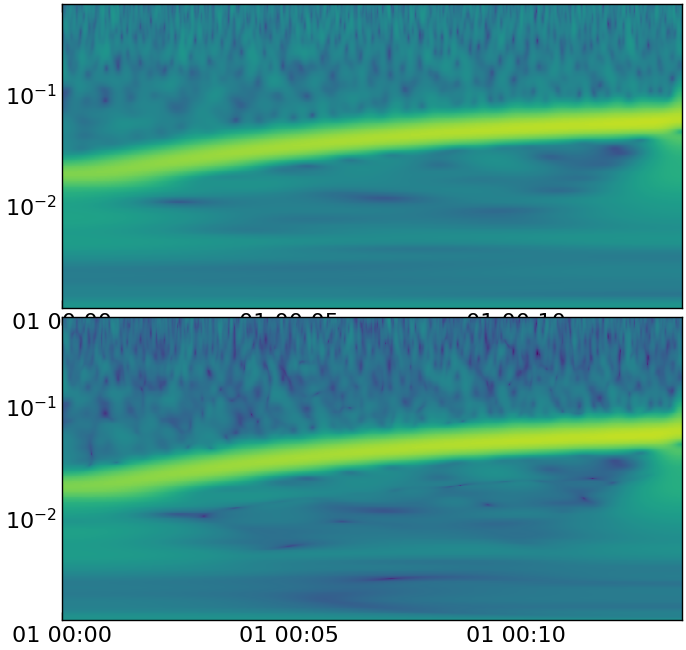

In [ ]:
from scipy.signal import butter, filtfilt
import pywt
import ssqueezepy
import matplotlib.dates as mdate

# ==== 时间参数 ====
fs = 5
npts = 2 ** 12
t = np.linspace(0, (npts - 1) / fs, npts)
dt = t[1] - t[0]

# ==== Background Magnetic Field ====
theta_b = 0.5 * np.pi * np.sin(2 * np.pi * 0.00002 * t)
phi_b = 0.5 * np.pi * np.cos(2 * np.pi * 0.00001 * t)
strength_b = 150 + 30 * np.sin(2 * np.pi * 0.0003 * t)

theta_b = 0.5 * np.pi * np.sin(2 * np.pi * 0.0000 * t)
phi_b = 0.5 * np.pi * np.cos(2 * np.pi * 0.0000 * t)
strength_b = 150 + 30 * np.sin(2 * np.pi * 0.000 * t)

bx = strength_b * np.sin(theta_b) * np.cos(phi_b)
by = strength_b * np.sin(theta_b) * np.sin(phi_b)
bz = strength_b * np.cos(theta_b)
b0 = np.stack([bx, by, bz], axis=1)  # T

# ==== Wave Magnetic Field ====
omega = 0.1 + 0.3 * np.sin(2 * np.pi * 0.0002 * t)
delta_phase = np.pi / 2 * (0.5 + 1.5 * np.sin(2 * np.pi * 0.0002 * t))
amp = np.linspace(5, 20, npts)

# ==== Direction of Propagation ====
theta1 = 0.3 * np.pi * (1 + np.cos(2 * np.pi * 0.0004 * t + 1.5))
phi1 = 0.4 * np.pi * (2 + np.sin(2 * np.pi * 0.0006 * t + 0.8))

dirb = b0 / np.linalg.norm(b0, axis = 1)[:, None]

dir1 = np.stack([
    np.sin(theta1) * np.cos(phi1),
    np.sin(theta1) * np.sin(phi1),
    np.cos(theta1)
], axis=1)

dir2 = np.cross(dir1, np.array([0, 0, 1]))  # 垂直于 dir1 的方向
dir3 = np.cross(dir1, dir2)  # 垂直于 dir1 和 dir2 的方向

dir2 /= np.linalg.norm(dir2, axis=1)[:, None]
dir3 /= np.linalg.norm(dir3, axis=1)[:, None]

phase = np.cumsum(omega * dt)

sig_b = amp[:, None] * (np.sin(phase)[:, None] * dir2 + np.sin(phase + delta_phase)[:, None] * dir3)  # nT
sig_b_dir = (np.sin(phase)[:, None] * dir2 + np.sin(phase + delta_phase)[:, None] * dir3)

sig_b = amp[:, None] * (np.exp(1j * phase)[:, None] * dir2 + np.exp(1j * (phase + delta_phase))[:, None] * dir3)
sig_b_dir = (np.sin(phase)[:, None] * dir2 + np.sin(phase + delta_phase)[:, None] * dir3)

v_phase = 300e3  # m/s
sig_e = v_phase * np.cross(dir1, sig_b)  # V/m


real_wna = np.arccos(np.abs(np.sum(dir1 * dirb, axis=1)))  # 波动方向与背景磁场的夹角
# real_compressibility = np.abs(np.sum(sig_b_dir * b0 / np.linalg.norm(sig_b_dir, axis = 1)[:, None] / np.linalg.norm(b0, axis = 1)[:, None], axis=1)) ** 2  # 压缩率
# real_compressibility = np.sum(dir2 * b0 / np.linalg.norm(b0, axis = 1)[:, None], axis=1) ** 2 + np.sum(dir3 * b0 / np.linalg.norm(b0, axis = 1)[:, None], axis=1) ** 2  # 压缩率

real_compressibility = ( np.sum(dir2 * dirb, axis=1) ** 2 + np.sum(dir3 * dirb, axis=1) ** 2  \
    + 2 * np.cos(delta_phase) * np.sum(dir2 * dirb, axis=1) * np.sum(dir3 * dirb, axis=1) ) / 2 # 压缩率

real_ellipticity_along_k = np.exp(-np.abs(np.log(np.abs(np.tan(delta_phase / 2))))) # 波动方向与背景磁场的夹角


dir2_perp = np.cross(dir3, dirb)  # 垂直于 dir1 的方向
dir3_perp = np.cross(dirb, dir2_perp)  # 垂直于 dir1 和 dir2 的方向

# dir2_perp = dir2 - np.sum(dir2 * dirb, axis=1)[:, None] * dirb  # 垂直于 dir2 的方向
# dir3_perp = dir3 - np.sum(dir3 * dirb, axis=1)[:, None] * dirb  # 垂直于 dir1 的方向

# ratio = np.linalg.norm(dir3_perp, axis=1) / np.linalg.norm(dir2_perp, axis=1)

dir2_perp /= np.linalg.norm(dir2_perp, axis=1)[:, None]
dir3_perp /= np.linalg.norm(dir3_perp, axis=1)[:, None]

epara2_to_epara3_ratio = np.linalg.norm(np.cross(dir2, dirb), axis = 1) / np.linalg.norm(np.cross(dir3, dirb), axis = 1)  # epara1 与 epara2 的比值

real_ellipticity_along_b = np.tan( 1 / 2 * np.arcsin(2 * epara2_to_epara3_ratio * np.sin(delta_phase) / (1 + epara2_to_epara3_ratio ** 2 ) ) )  # 波动方向与背景磁场的夹角

amp2_perp = np.sum(sig_b * dir2_perp, axis = 1)
amp3_perp = np.sum(sig_b * dir3_perp, axis = 1)

amp_ratio_b = np.abs(amp2_perp) / np.abs(amp3_perp)
delta_phase_b = np.angle(amp2_perp) - np.angle(amp3_perp)

real_ellipticity_along_b = np.tan( 1 / 2 * np.arcsin(2 * amp_ratio_b * np.sin(delta_phase_b) / (1 + amp_ratio_b ** 2 ) ) )  # 波动方向与背景磁场的夹角

sig_poynting = np.cross(sig_e, sig_b.conj())  # V/m * T = Wb / m^2
real_poynting_angle = np.arccos((np.sum(sig_poynting.real * b0 / np.linalg.norm(sig_poynting.real, axis = 1)[:, None] / np.linalg.norm(b0, axis = 1)[:, None], axis=1)))  # 波动方向与背景磁场的夹角

# ==== Red Noise ====
noise_level = 3.0
white_b = np.random.randn(npts, 3) * noise_level
white_e = np.random.randn(npts, 3) * noise_level * v_phase
b_r, a_r = butter(2, 0.05)
red_b = filtfilt(b_r, a_r, white_b, axis=0)  # nT
red_e = filtfilt(b_r, a_r, white_e, axis=0)  # nT

# ==== 合成总磁场 B 与电场 E ====
b = b0 + sig_b + white_b  # nT
e = sig_e + white_e               # mV/m


NANOSECOND_TO_SECOND = 1e9

# Generate Vector Signal
sig_ut = np.copy(t * NANOSECOND_TO_SECOND).astype('datetime64[ns]')
sig_bx = b[:, 0].real
sig_by = b[:, 1].real
sig_bz = b[:, 2].real
sig_bt = np.sqrt(sig_bx ** 2 + sig_by ** 2 + sig_bz ** 2)

sig_ex = e[:, 0].real
sig_ey = e[:, 1].real
sig_ez = e[:, 2].real

%matplotlib ipympl

plt.close()

# plt.gcf().set_size_inches(8.0, 16.0)
plt.figure(figsize=(8, 8))
plt.subplots_adjust(hspace = 0.03, right = 0.90)
# matplotlib.rcParams['figure.dpi'] = 300

fig = plt.gcf()

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2, sharex = ax1, sharey = ax1)


use_wavelet = True

if use_wavelet:
    bandwidth = 6.0
    # log-scale
    scales = np.power(2, np.linspace(3, 12, 360 + 1))
    # linear-scale (for comparing with the windowed FFT)
    # scales = np.arange(2, 400)
    downsample = 1 # For comparing with the windowed FFT with a step of 50
    freq_window = 31
    time_window = 101
    downsample_signal = False # Downsample the signal before computing wavelet coefficients (True) or Downsample the coefficients after computing (False)

    t, f, coef_bx, psd_bx, avg_bx = wavelet_coef_psd(sig_ut, sig_bx, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)
    _, _, coef_by, psd_by, avg_by = wavelet_coef_psd(sig_ut, sig_by, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)
    _, _, coef_bz, psd_bz, avg_bz = wavelet_coef_psd(sig_ut, sig_bz, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)
    _, _, coef_bt, psd_bt, avg_bt = wavelet_coef_psd(sig_ut, sig_bt, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)

    _, _, coef_ex, psd_ex, avg_ex = wavelet_coef_psd(sig_ut, sig_ex, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)
    _, _, coef_ey, psd_ey, avg_ey = wavelet_coef_psd(sig_ut, sig_ey, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)
    _, _, coef_ez, psd_ez, avg_ez = wavelet_coef_psd(sig_ut, sig_ez, scales, bandwidth, downsample = downsample, downsample_signal = downsample_signal)

    coi = (np.sqrt(2) * bandwidth / (2 * np.pi) / f).astype(float)
    if isinstance(sig_ut[0], np.datetime64):
        coi = (1e9 * coi).astype('timedelta64[ns]')

else:

    freq_window = 2
    time_window = 2
    
    step = 2 ** 6
    window = 2 ** 12

    t, f, coef_bx, psd_bx, avg_bx = wfft_coef_psd(sig_ut, sig_bx, step = step, window = window)
    _, _, coef_by, psd_by, avg_by = wfft_coef_psd(sig_ut, sig_by, step = step, window = window)
    _, _, coef_bz, psd_bz, avg_bz = wfft_coef_psd(sig_ut, sig_bz, step = step, window = window)
    _, _, coef_bt, psd_bt, _ = wfft_coef_psd(sig_ut, sig_bt, step = step, window = window)

    _, _, coef_ex, psd_ex, avg_ex = wfft_coef_psd(sig_ut, sig_ex, step = step, window = window)
    _, _, coef_ey, psd_ey, avg_ey = wfft_coef_psd(sig_ut, sig_ey, step = step, window = window)
    _, _, coef_ez, psd_ez, avg_ez = wfft_coef_psd(sig_ut, sig_ez, step = step, window = window)

    downsample = 1


psd_b = (psd_bx + psd_by + psd_bz)
psd_e = (psd_ex + psd_ey + psd_ez)

psd_threshold = 1e-3 * np.nanmax(psd_b)

coef = np.array([coef_bx, coef_by, coef_bz]).transpose(1, 2, 0)
avg = np.array([avg_bx, avg_by, avg_bz]).T
magf_direction = ((avg.T) / np.linalg.norm(avg, axis = 1)).T

planarity, ellipticity_along_k, coherence, degree_of_polarization, vh = svd_wave_analysis(coef, freq_window = freq_window, time_window = time_window)
compressibility, ellipticity_along_b = fac_wave_analysis(coef, magf_direction)
wave_normal_angle = np.rad2deg(np.arccos(np.abs(np.sum(magf_direction * vh[:, :, 2, :], axis = -1))))
poynting_matrix = np.cross(np.array([coef_ex, coef_ey, coef_ez]).transpose(1, 2, 0), np.conj(np.array([coef_bx, coef_by, coef_bz])).transpose(1, 2, 0), axis = -1)
poynting_angle = np.rad2deg(np.arccos((np.sum(magf_direction * ((poynting_matrix.real.T) / np.linalg.norm(poynting_matrix.real.T, axis = 0)).T, axis = -1))))

pc1 = ax1.pcolormesh(t, f, np.log10(psd_b), cmap='viridis', shading='auto', vmax = 5.0, vmin = -2.0, rasterized = True)
pc2 = ax2.pcolormesh(t, f, np.log10(psd_b * degree_of_polarization), cmap='viridis', shading='auto', vmax = 5.0, vmin = -2.0, rasterized = True)
# pc2 = ax2.pcolormesh(time, frequency, ((degree_of_polarization)), cmap='Reds', shading='auto', vmax = 1.0, vmin = 0.0, rasterized = True)
ax1.set_yscale('log')
plt.show()